# 6th Set of Exercises
# Michele M. Crudele
# 2021858

# 1st Exercise

In [1]:
dt <- 10
ct <- c(4, 1, 3, 1, 3)
a.unif <- sum(ct)+1
a.jeff <- sum(ct)+1/2
n <- length(ct)
N = 1/200
x <- seq(0, 7, N)

In [2]:
unif.post <- dgamma(x, a.unif, rate = n)
jeff.post <- dgamma(x, a.jeff, rate = n)

In [3]:
#numeric mean
mean.unif <- mean(rgamma(10000, a.unif, rate=n))
mean.jeff <- mean(rgamma(10000, a.jeff, rate=n))

#analytic mean
mu.unif <- a.unif/n 
mu.jeff <- a.jeff/n 

#numeric median
median.unif <- median(rgamma(10000, a.unif, rate=n)) 
median.jeff <- median(rgamma(10000, a.jeff, rate=n))

#median from data
median <- median(ct)

#numeric variance
var.num.unif <- var(rgamma(10000, a.unif, rate=n))
var.num.jeff <- var(rgamma(10000, a.jeff, rate=n))

#analytic variance
var.unif <- a.unif/(n^2) 
var.jeff <- a.jeff/(n^2)

In [4]:
plt <- function(prior) {
    options(repr.plot.width = 6, repr.plot.height = 5)
    if (prior == "Uniform") {
        plot (x, unif.post, type='l', col='red', lwd=3, xlab=expression(mu), 
              ylab=expression("P("*mu*"|{x"[j]*"})"), 
              main='Posterior distribution from Uniform prior', cex.main=0.81)
        abline(v=mu.unif, lwd=3, col='black', lty=1)
        abline(v=mean.unif, lwd=2, col='green', lty=2)
        abline(v=median.unif, lwd=3, col='blue', lty=3)
        abline(v=median, lwd=3, col='purple', lty=4)
        abline(v=mean.unif)
        legend(3.7, 0.58, legend=c(paste("Analytic Mean:", mu.unif), 
                               paste("Numeric Mean:",round(mean.unif,2)), 
                               paste("Numeric Median:", round(median.unif, 2)),
                               paste("Median from Data:", median)),
           col=c('black', 'green', 'blue', 'purple'),  lty=c(1, 1, 1), lwd=3, bty='n', y.intersp=2)
        } else {
        plot (x, jeff.post, type='l', col='red', lwd=3, xlab=expression(mu), 
              ylab=expression("P("*mu*"|{x"[j]*"})"), 
              main="Posterior distribution from Jeffrey's prior", cex.main=0.81)
        abline(v=mu.jeff, lwd=3, col='black', lty=1)
        abline(v=mean.jeff, lwd=2, col='green', lty=2)
        abline(v=median.jeff, lwd=3, col='blue', lty=3)
        abline(v=median, lwd=3, col='purple', lty=4)
        legend(3.7, 0.58, legend=c(paste("Analytic Mean:", mu.jeff), 
                               paste("Numeric Mean:", round(mean.jeff,2)), 
                               paste("Numeric Median:", round(median.jeff, 2)),
                               paste("Median from Data:", median)), 
           col=c('black', 'green', 'blue', 'purple'),  lty=c(1, 1, 1), lwd=4, bty='n', y.intersp=2)
    }
}

## Uniform Prior

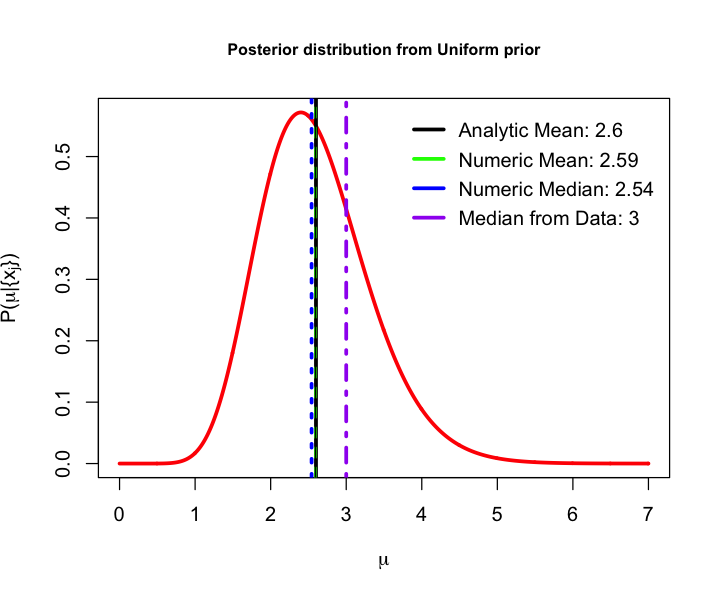

In [5]:
plt("Uniform")

In [6]:
cat("The variance computed numerically from Uniform prior is equal to:", var.num.unif)
cat("\nThe variance computed analytically from Uniform prior is equal to:", var.unif)

The variance computed numerically from Uniform prior is equal to: 0.5215619
The variance computed analytically from Uniform prior is equal to: 0.52

## Jeffrey's Prior

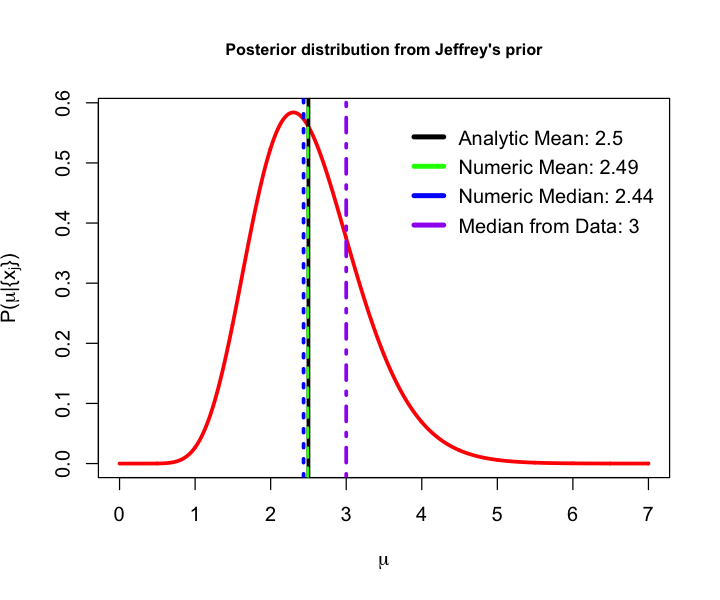

In [7]:
plt("Jeffrey")

In [8]:
cat("The variance computed numerically from Jeffrey's prior is equal to:", var.num.jeff)
cat("\nThe variance computed analytically from Jeffrey's prior is equal to:", var.jeff)

The variance computed numerically from Jeffrey's prior is equal to: 0.4962612
The variance computed analytically from Jeffrey's prior is equal to: 0.5

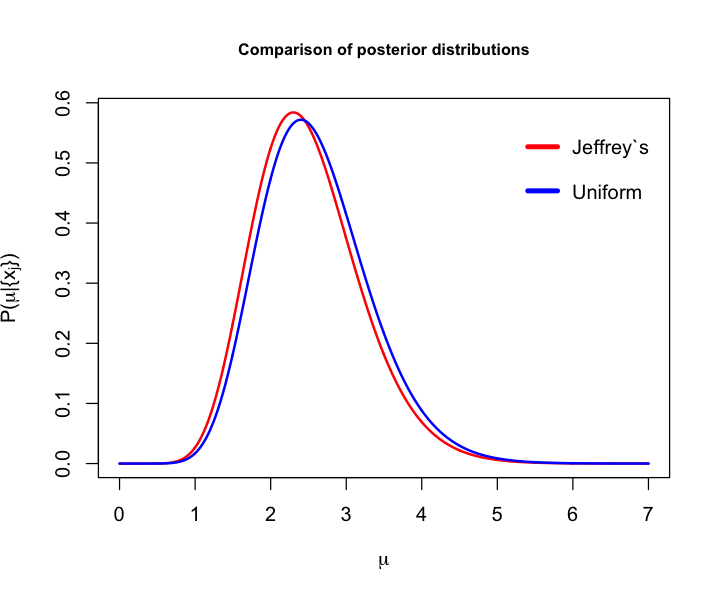

In [9]:
plot(x, jeff.post, type='l', col='red', lwd=2, xlab=expression(mu), 
      ylab=expression("P("*mu*"|{x"[j]*"})"), 
      main='Comparison of posterior distributions', cex.main=0.81)

lines(x, unif.post, type='l', col='blue', lwd = 2)

legend("topright", legend=c("Jeffrey`s", "Uniform"), inset = 0.05,
       col=c('red', 'blue'),  lty=c(1, 1), lwd=4, bty='n', y.intersp=3)


In [10]:
# function to determine credibility intervals
confidence <- function(post, conf) {
    a <- 1-conf
    high <- 7
    x <- seq(0, high, 0.0001)
    
    int <- function(x) {
        (integrate(post, 0, x)$value)/(integrate(post, 0, high)$value) #normalization
    }

    s <- lapply(x, int)

    min <- min(x[which(s>a/2)])
    max <- min(x[which(s>1-a/2)])

return(list(min, max))
}

In [11]:
unif.post <- function(x) {dgamma(x, a.unif, rate = n)}
jeff.post <- function(x) {dgamma(x, a.jeff, rate = n)}

norm.unif.post <- function(x) {dnorm(x, mu.unif, sqrt(var.unif))}
norm.jeff.post <- function(x) {dnorm(x, mu.jeff, sqrt(var.jeff))}

In [12]:
unif <- confidence(unif.post, 0.95)
unif.low <- unif[[1]]
unif.high <- unif[[2]]

jeff <- confidence(jeff.post, 0.95)
jeff.low <- jeff[[1]]
jeff.high <- jeff[[2]]

norm.unif <- confidence(norm.unif.post, 0.95)
norm.unif.low <- norm.unif[[1]]
norm.unif.high <- norm.unif[[2]]

norm.jeff <- confidence(norm.jeff.post, 0.95)
norm.jeff.low <- norm.jeff[[1]]
norm.jeff.high <- norm.jeff[[2]]

In [13]:
x.u <- seq(unif.low, unif.high, length.out=length(x))
y.u <- c(unif.post(x.u)/(N*sum(unif.post(x))))
y.u[1]=0
y.u[length(y.u)]=0

x.j <- seq(jeff.low, jeff.high, length.out=length(x))
y.j <- c(jeff.post(x.j)/(N*sum(jeff.post(x))))
y.j[1]=0
y.j[length(y.j)]=0

norm.x.u <- seq(norm.unif.low, norm.unif.high, length.out=length(x))
norm.y.u <- c(norm.unif.post(norm.x.u)/(N*sum(norm.unif.post(x))))
norm.y.u[1]=0
norm.y.u[length(norm.y.u)]=0

norm.x.j <- seq(norm.jeff.low, norm.jeff.high, length.out=length(x))
norm.y.j <- c(norm.jeff.post(norm.x.j)/(N*sum(norm.jeff.post(x))))
norm.y.j[1]=0
norm.y.j[length(norm.y.j)]=0

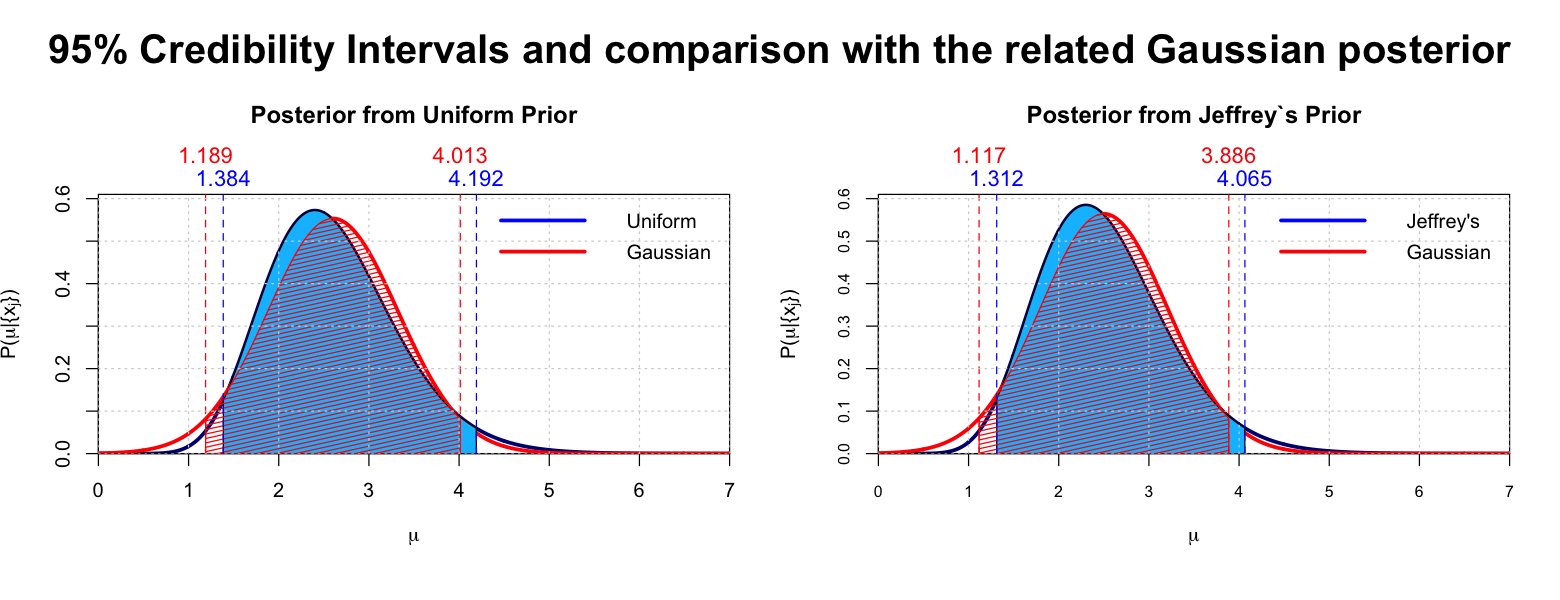

In [14]:
par(mfrow=c(1, 2), oma=c(1,0,4,0))
options(repr.plot.width=13, repr.plot.height=5)

# unif
plot(x, unif.post(x)/(N*sum(unif.post(x))), 
     xaxs='i', yaxs='i', col='navy', 
     type='l', lty=1, lwd=3, 
     ylim=c(0,0.61), xlab=expression(mu), 
     ylab=expression("P("*mu*"|{x"[j]*"})"),
     cex.main=0.8, pch=1)
title('Posterior from Uniform Prior', line = 3)
lines(x, norm.unif.post(x)/(N*sum(norm.unif.post(x))), 
     xaxs='i', yaxs='i', col='red', 
     type='l', lty=1, lwd=3,
     pch=1)

polygon(x=x.u , y=y.u, col='deepskyblue', pch=1)
polygon(x=norm.x.u , y=norm.y.u, col='red', pch=1, density = 20)

abline(v=unif.low, col="blue", lty=2, pch=1)
abline(v=unif.high, col="blue", lty=2, pch=1)
abline(v=norm.unif.low, col="red", lty=2, pch=1)
abline(v=norm.unif.high, col="red", lty=2, pch=1)

text(unif.low, par("usr")[4]+0.08, labels = round(unif.low,3),  pos = 1, cex = 1.1, col="blue", xpd=TRUE)
text(unif.high, par("usr")[4]+0.08, labels = round(unif.high,3), pos = 1, cex = 1.1, col="blue", xpd=TRUE)
text(norm.unif.low, par("usr")[4]+0.135, labels = round(norm.unif.low, 3),  pos = 1, cex = 1.1, col="red", xpd=TRUE)
text(norm.unif.high, par("usr")[4]+0.135, labels = round(norm.unif.high, 3), pos = 1, cex = 1.1, col="red", xpd=TRUE)

grid()

legend(4, 0.6, legend=c("Uniform", "Gaussian"),
       col=c('blue', 'red'),  lty=c(1, 1), lwd=3, bty='n', y.intersp=2.5)

# jeff
plot(x, jeff.post(x)/(N*sum(jeff.post(x))), 
     xaxs='i', yaxs='i', col='navy', 
     type='l', lty=1, lwd=3, cex.axis=0.8,
     ylim=c(0,0.61), xlab=expression(mu), 
     ylab=expression("P("*mu*"|{x"[j]*"})"),
     pch=1)
title('Posterior from Jeffrey`s Prior', line = 3)
lines(x, norm.jeff.post(x)/(N*sum(norm.jeff.post(x))), 
     xaxs='i', yaxs='i', col='red', lty=1, lwd=3, 
     pch=1)

polygon(x=x.j , y=y.j, col='deepskyblue', pch=1)
polygon(x=norm.x.j , y=norm.y.j, col='red', pch=1, density = 20)

abline(v=jeff.low, col="blue", lty=2, pch=1)
abline(v=jeff.high, col="blue", lty=2, pch=1)
abline(v=norm.jeff.low, col="red", lty=2, pch=1)
abline(v=norm.jeff.high, col="red", lty=2, pch=1)

text(jeff.low, par("usr")[4]+0.08, labels = round(jeff.low, 3),  pos = 1, cex = 1.1, col="blue", xpd=TRUE)
text(jeff.high, par("usr")[4]+0.08, labels = round(jeff.high, 3), pos = 1, cex = 1.1, col="blue", xpd=TRUE)
text(norm.jeff.low, par("usr")[4]+0.135, labels = round(norm.jeff.low, 3),  pos = 1, cex = 1.1, col="red", xpd=TRUE)
text(norm.jeff.high, par("usr")[4]+0.135, labels = round(norm.jeff.high, 3), pos = 1, cex = 1.1, col="red", xpd=TRUE)

grid()

legend(4, 0.6, legend=c("Jeffrey's", "Gaussian"),
       col=c('blue', 'red'),  lty=c(1, 1), lwd=3, bty='n', y.intersp=2.5)

title("95% Credibility Intervals and comparison with the related Gaussian posterior", outer = TRUE, cex.main=2)


# 2nd Exercise

In [15]:
p.log.like <- function(a, b, data) {
    logL <- 0.0
    for (x in data) {
        logL <- logL + log(b) - log(b^2 + (x-a)^2)
    }
    return(logL)
}

In [16]:
n.sample <- 200
x.min <- -2; x.max <- +4
alpha <- seq(x.min, x.max, length.out = n.sample)
beta <- seq(0, 4, length.out = n.sample)

In [17]:
# true values in order to generate sensible random data and check 
true.beta <- 2
true.alpha <- 1

The red dotted lines in the plots represent the true values of alpha and beta. 
As we can see from the plots, the more the flashes the higher the precision, as expected.

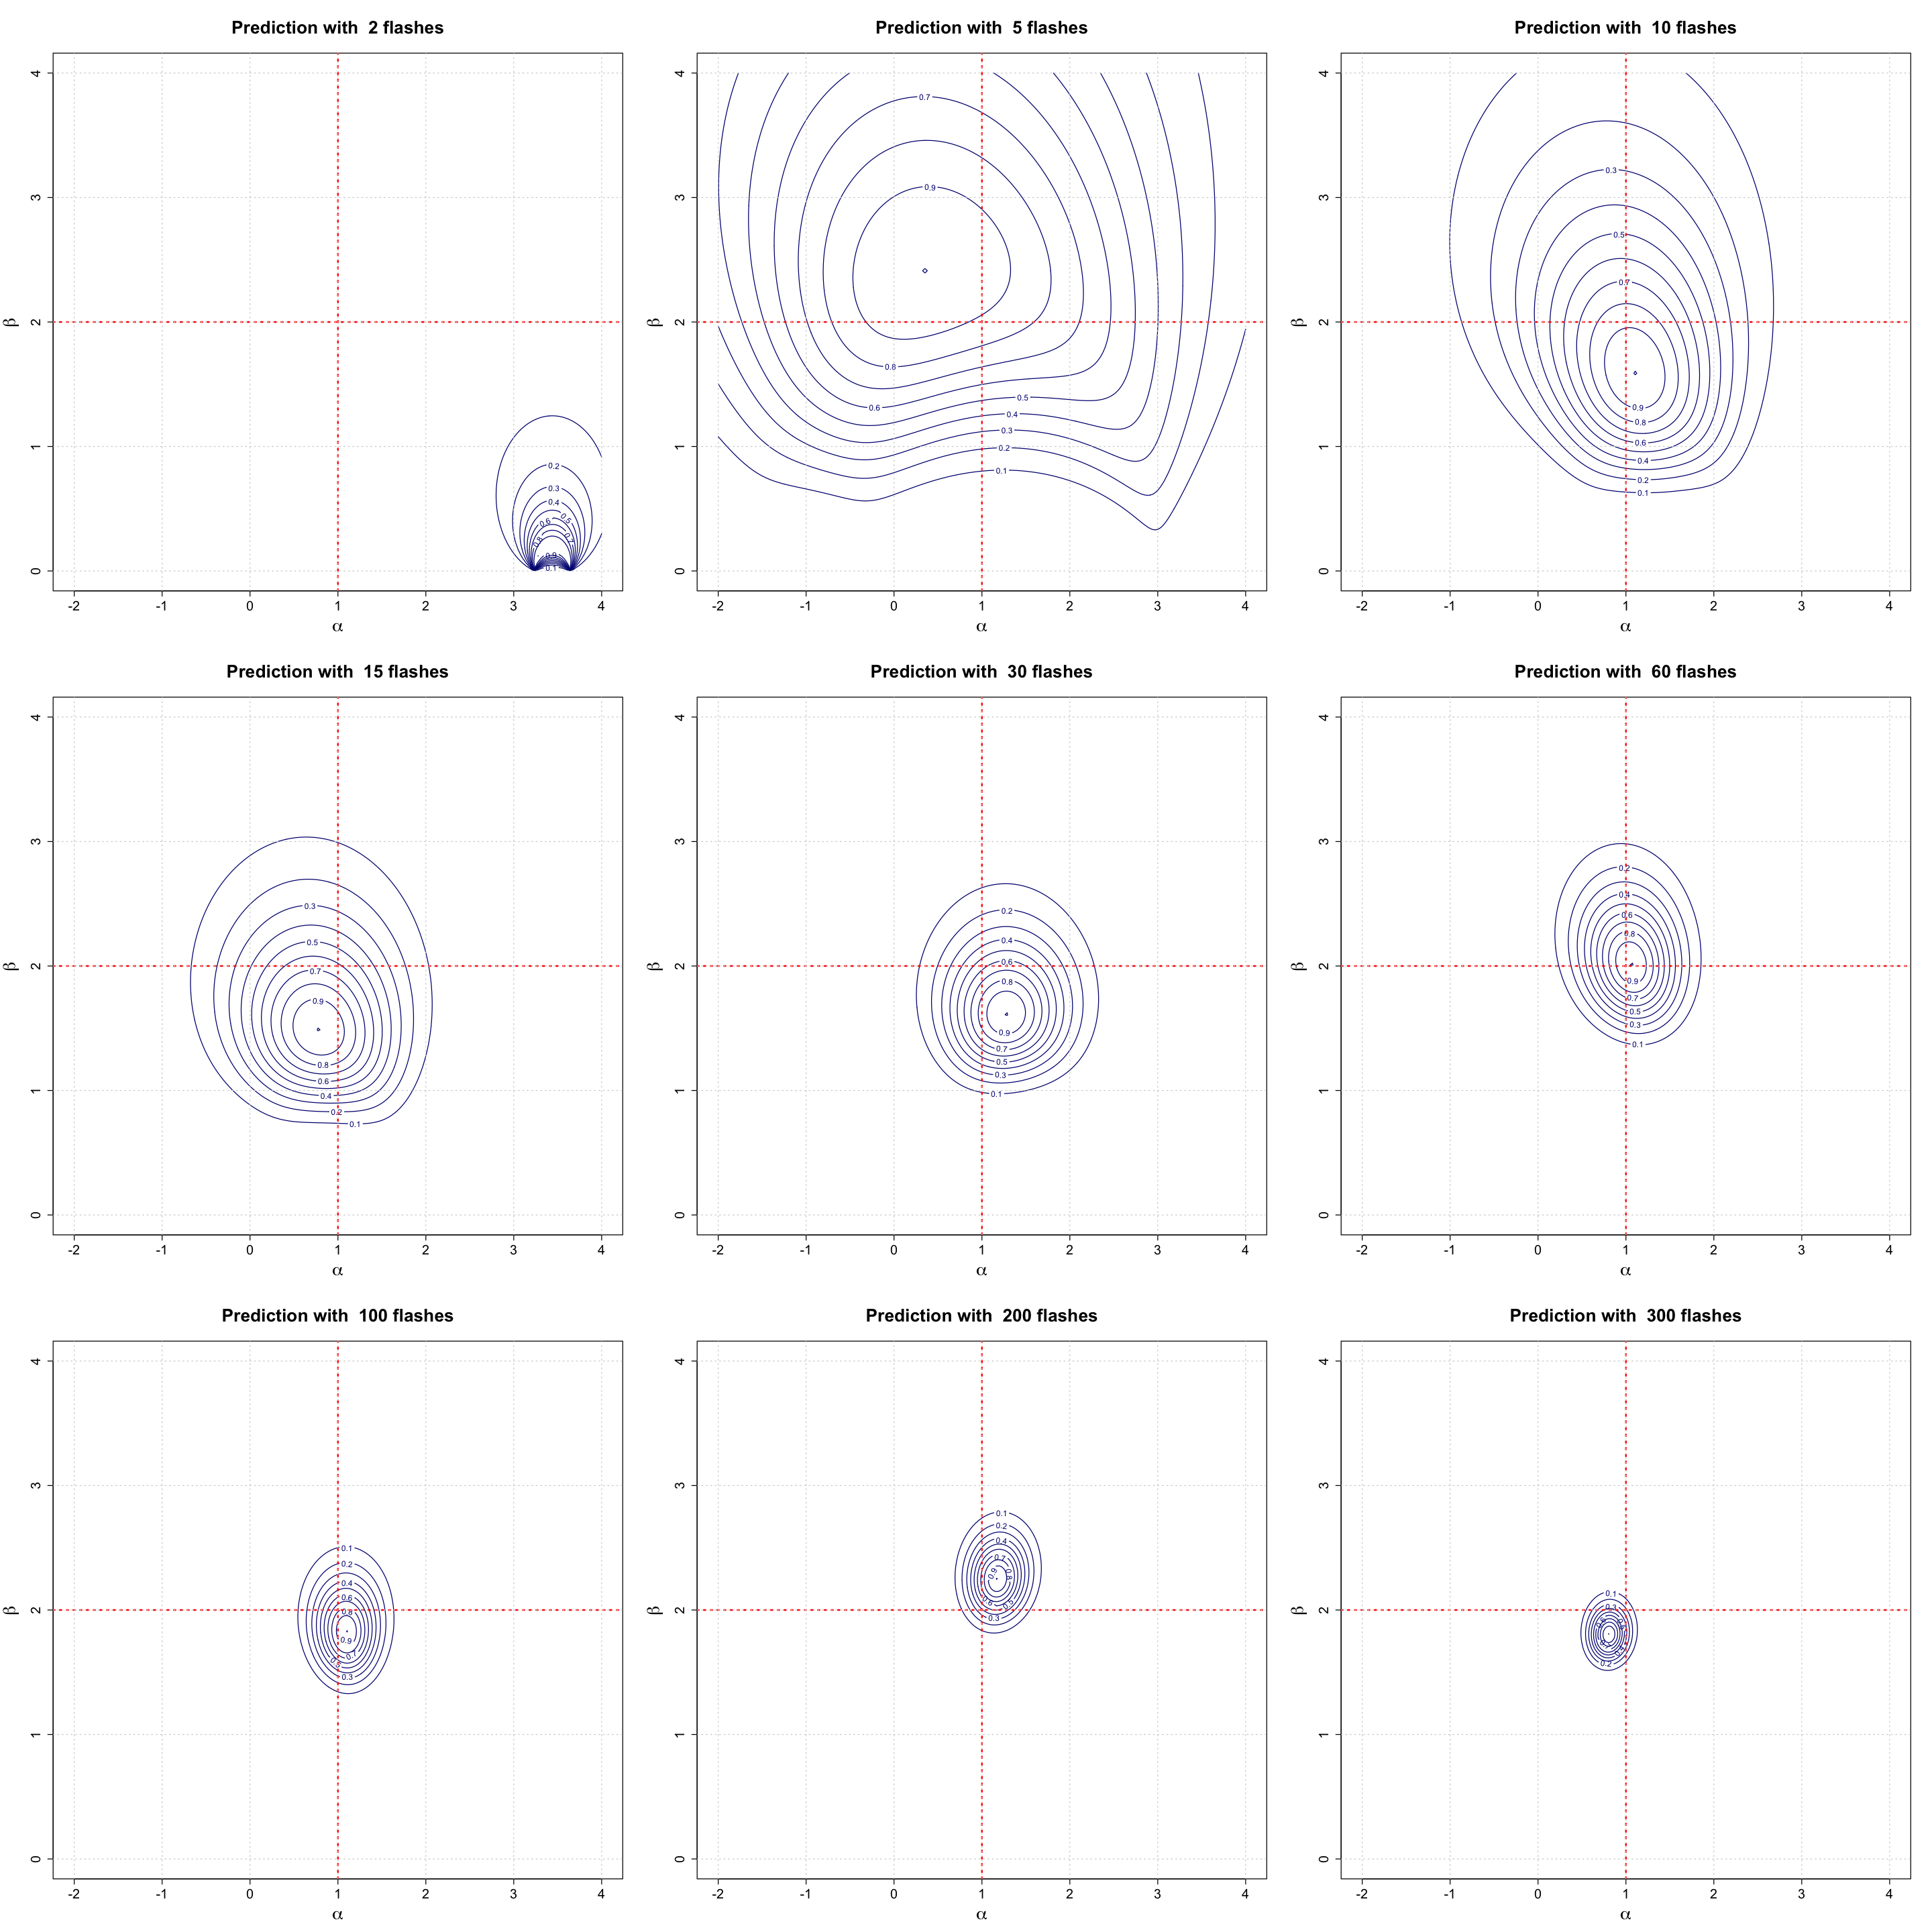

In [18]:
par(mfrow=c(3, 3), cex.main = 2, cex.lab=2, cex.axis=1.5, mar=c(5, 5, 5, 2))
options(repr.plot.width=24,repr.plot.height=24)

s <- c(2, 5, 10, 15, 30, 60, 100, 200, 300)
cat("The red dotted lines in the plots represent the true values of alpha and beta. 
As we can see from the plots, the more the flashes the higher the precision, as expected.")
for (n in s){
    z <- matrix(data=NA, nrow=length(alpha), ncol=length(beta))
    
    theta <- runif(n, -pi/2, pi/2) #random angles
    dt <- true.beta * tan(theta) + true.alpha #compute the x
    
    for(j in 1:length(alpha)) {
        for(k in 1:length(beta)) {
            z[j,k] <- p.log.like(alpha[j], beta[k], dt)
            }
        }
    
    z <- z - max(z)
    
    contour(alpha, beta, exp(z),  col = "navy",
            xlab=expression(alpha), ylab=expression(beta), main=paste("Prediction with ", n, "flashes"))
    abline (v=true.alpha,h=true.beta, col="red", lty=3, lwd=2)
    grid()
}

## Marginalization

The red vertical line in the plots represent the true value of alpha

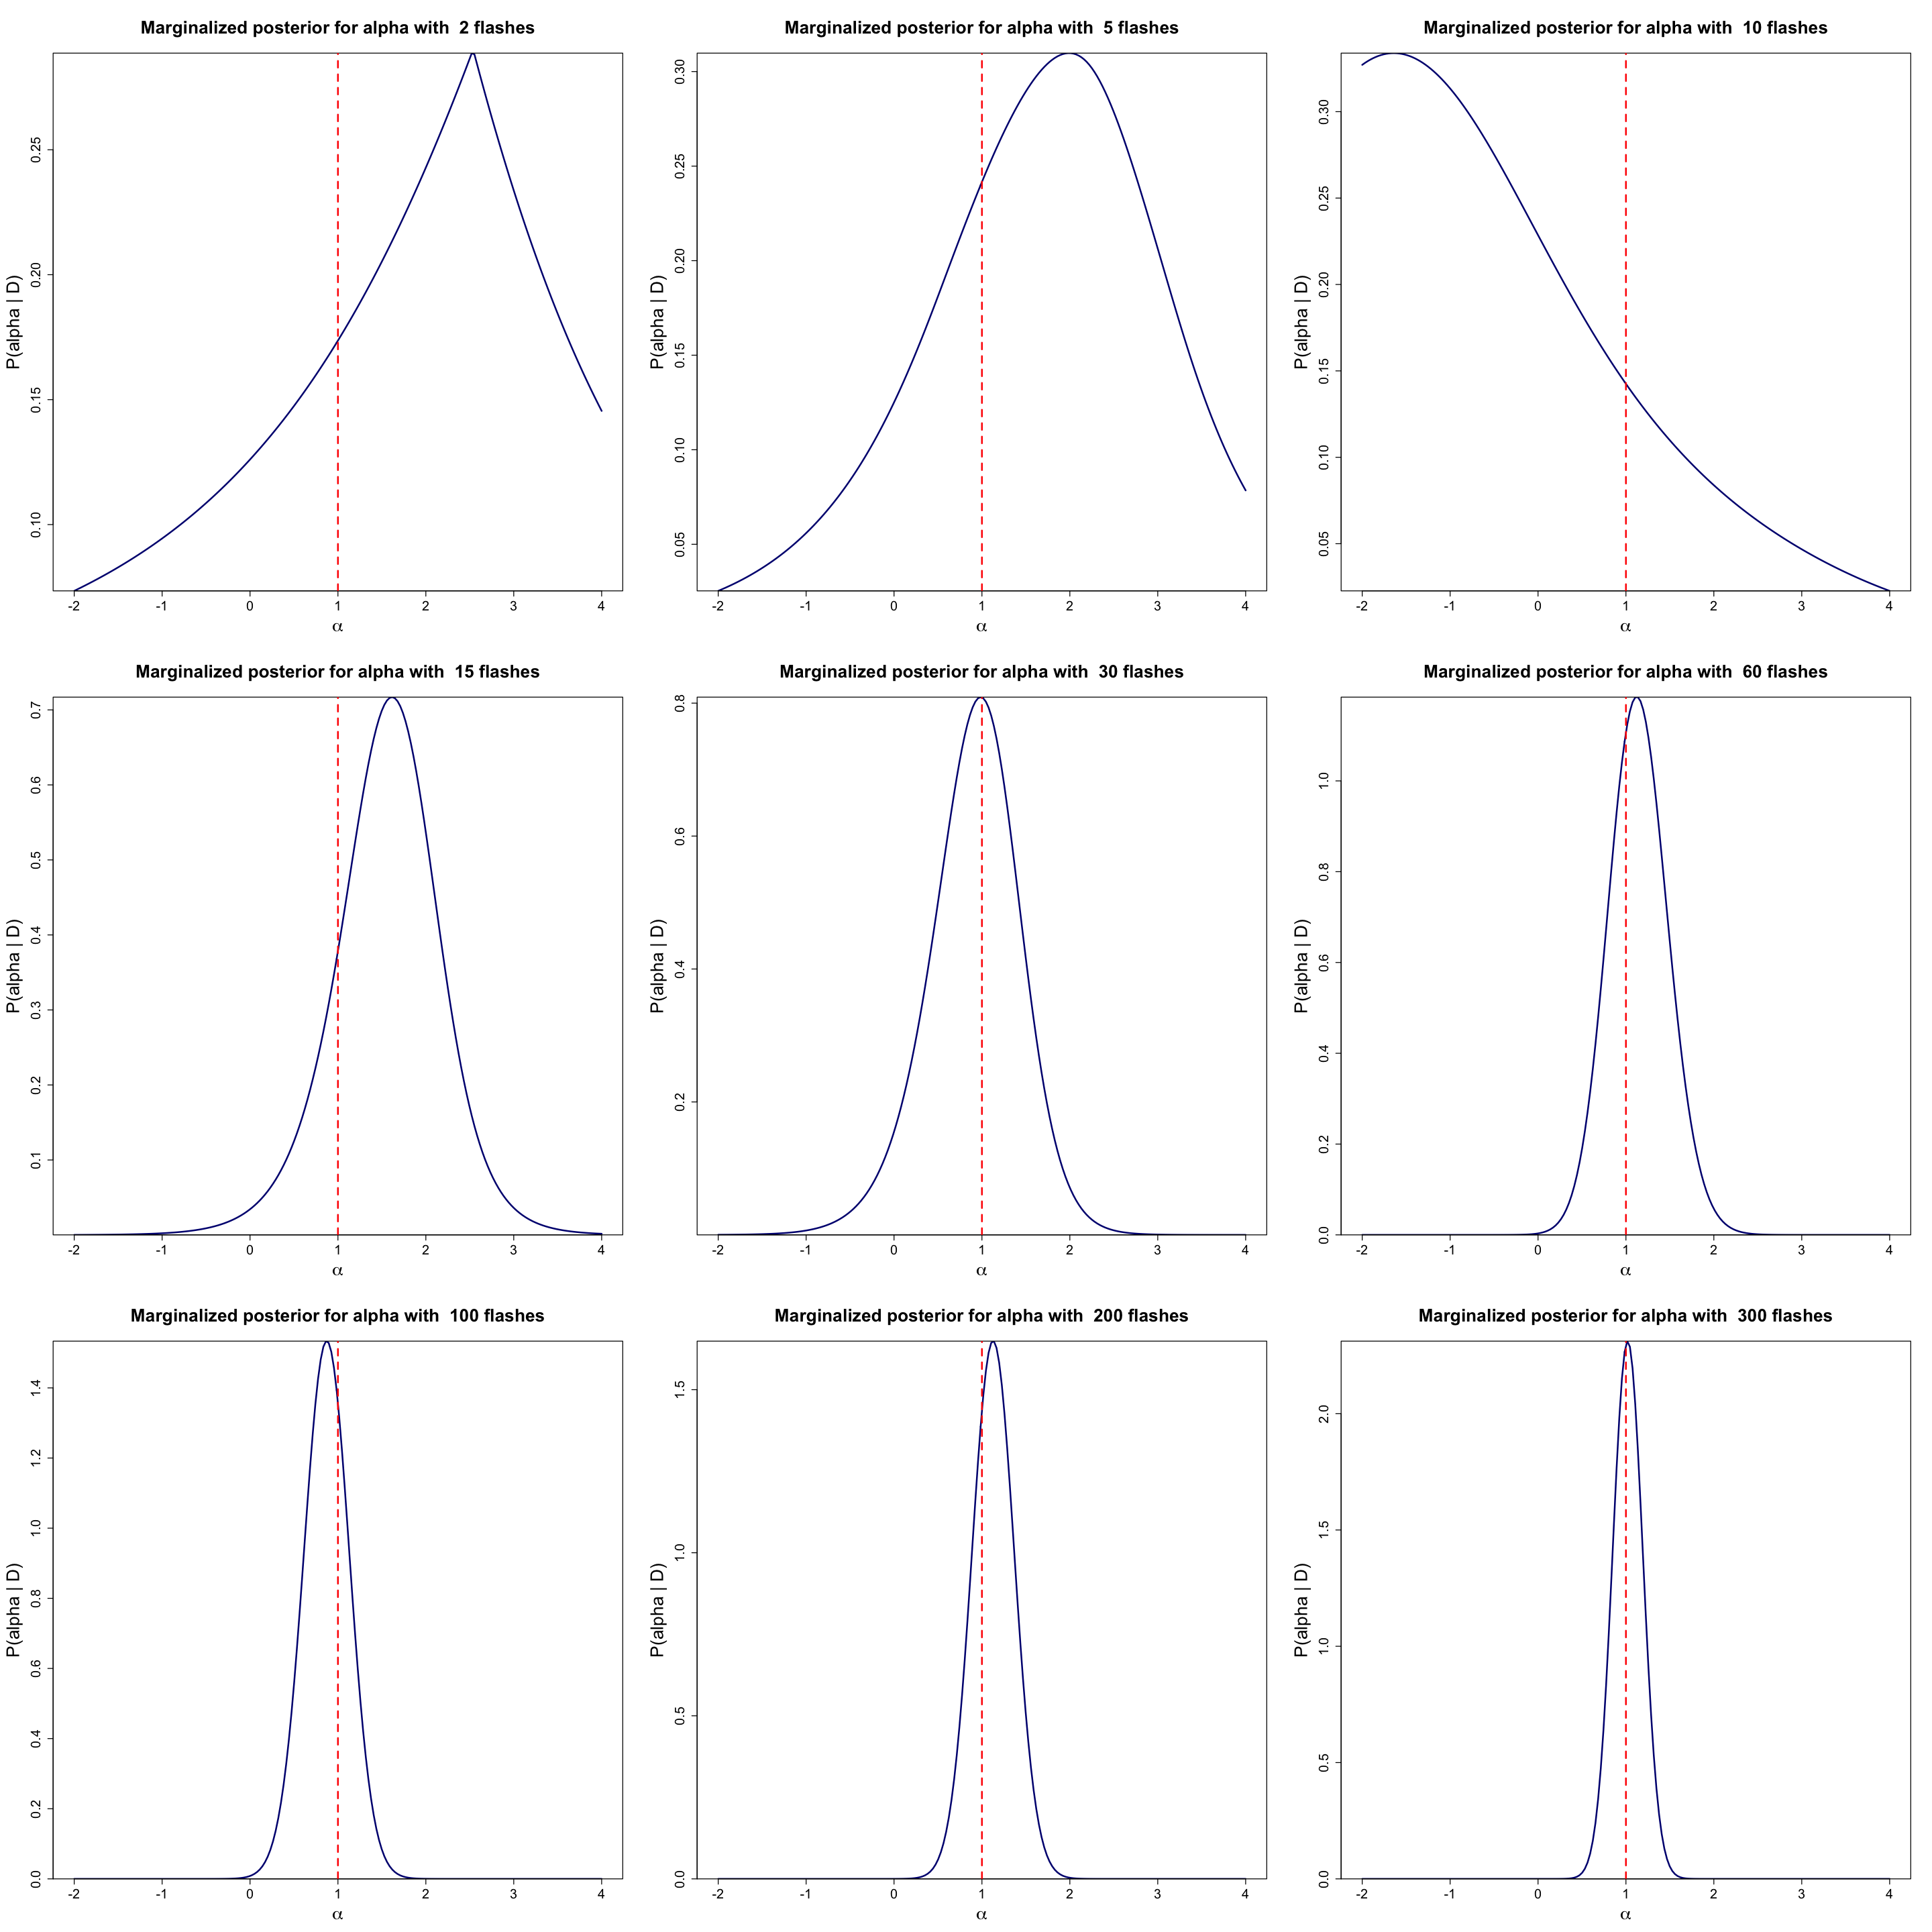

In [19]:
par(mfrow=c(3, 3), cex.main = 2, cex.lab=2, cex.axis=1.5, mar=c(5, 5, 5, 2))
options(repr.plot.width=24,repr.plot.height=24)

s <- c(2, 5, 10, 15, 30, 60, 100, 200, 300)
cat("The red vertical line in the plots represent the true value of alpha")
for (n in s){
    z <- matrix(data=NA, nrow=length(alpha), ncol=length(beta))
    
    theta <- runif(n, -pi/2, pi/2) #random angles
    dt <- true.beta * tan(theta) + true.alpha #compute the x
    
    for(j in 1:length(alpha)) {
        for(k in 1:length(beta)) {
            z[j,k] <- p.log.like(alpha[j], beta[k], dt)
            }
        }
    
    z <- z - max(z)
    
    p_a_D <- apply(exp(z), 1, sum)
    p_a_D <- p_a_D/(diff(alpha)[1]*sum(p_a_D))

    plot(alpha, p_a_D, xlab=expression(alpha), yaxs="i", ylab="P(alpha | D)", type="l", lwd=2,
         main=paste("Marginalized posterior for alpha with ", n, "flashes"), col="navy")
    abline(v=true.alpha, col="red", lwd=2, lty=2)
}

The red vertical line in the plots represent the true value of beta

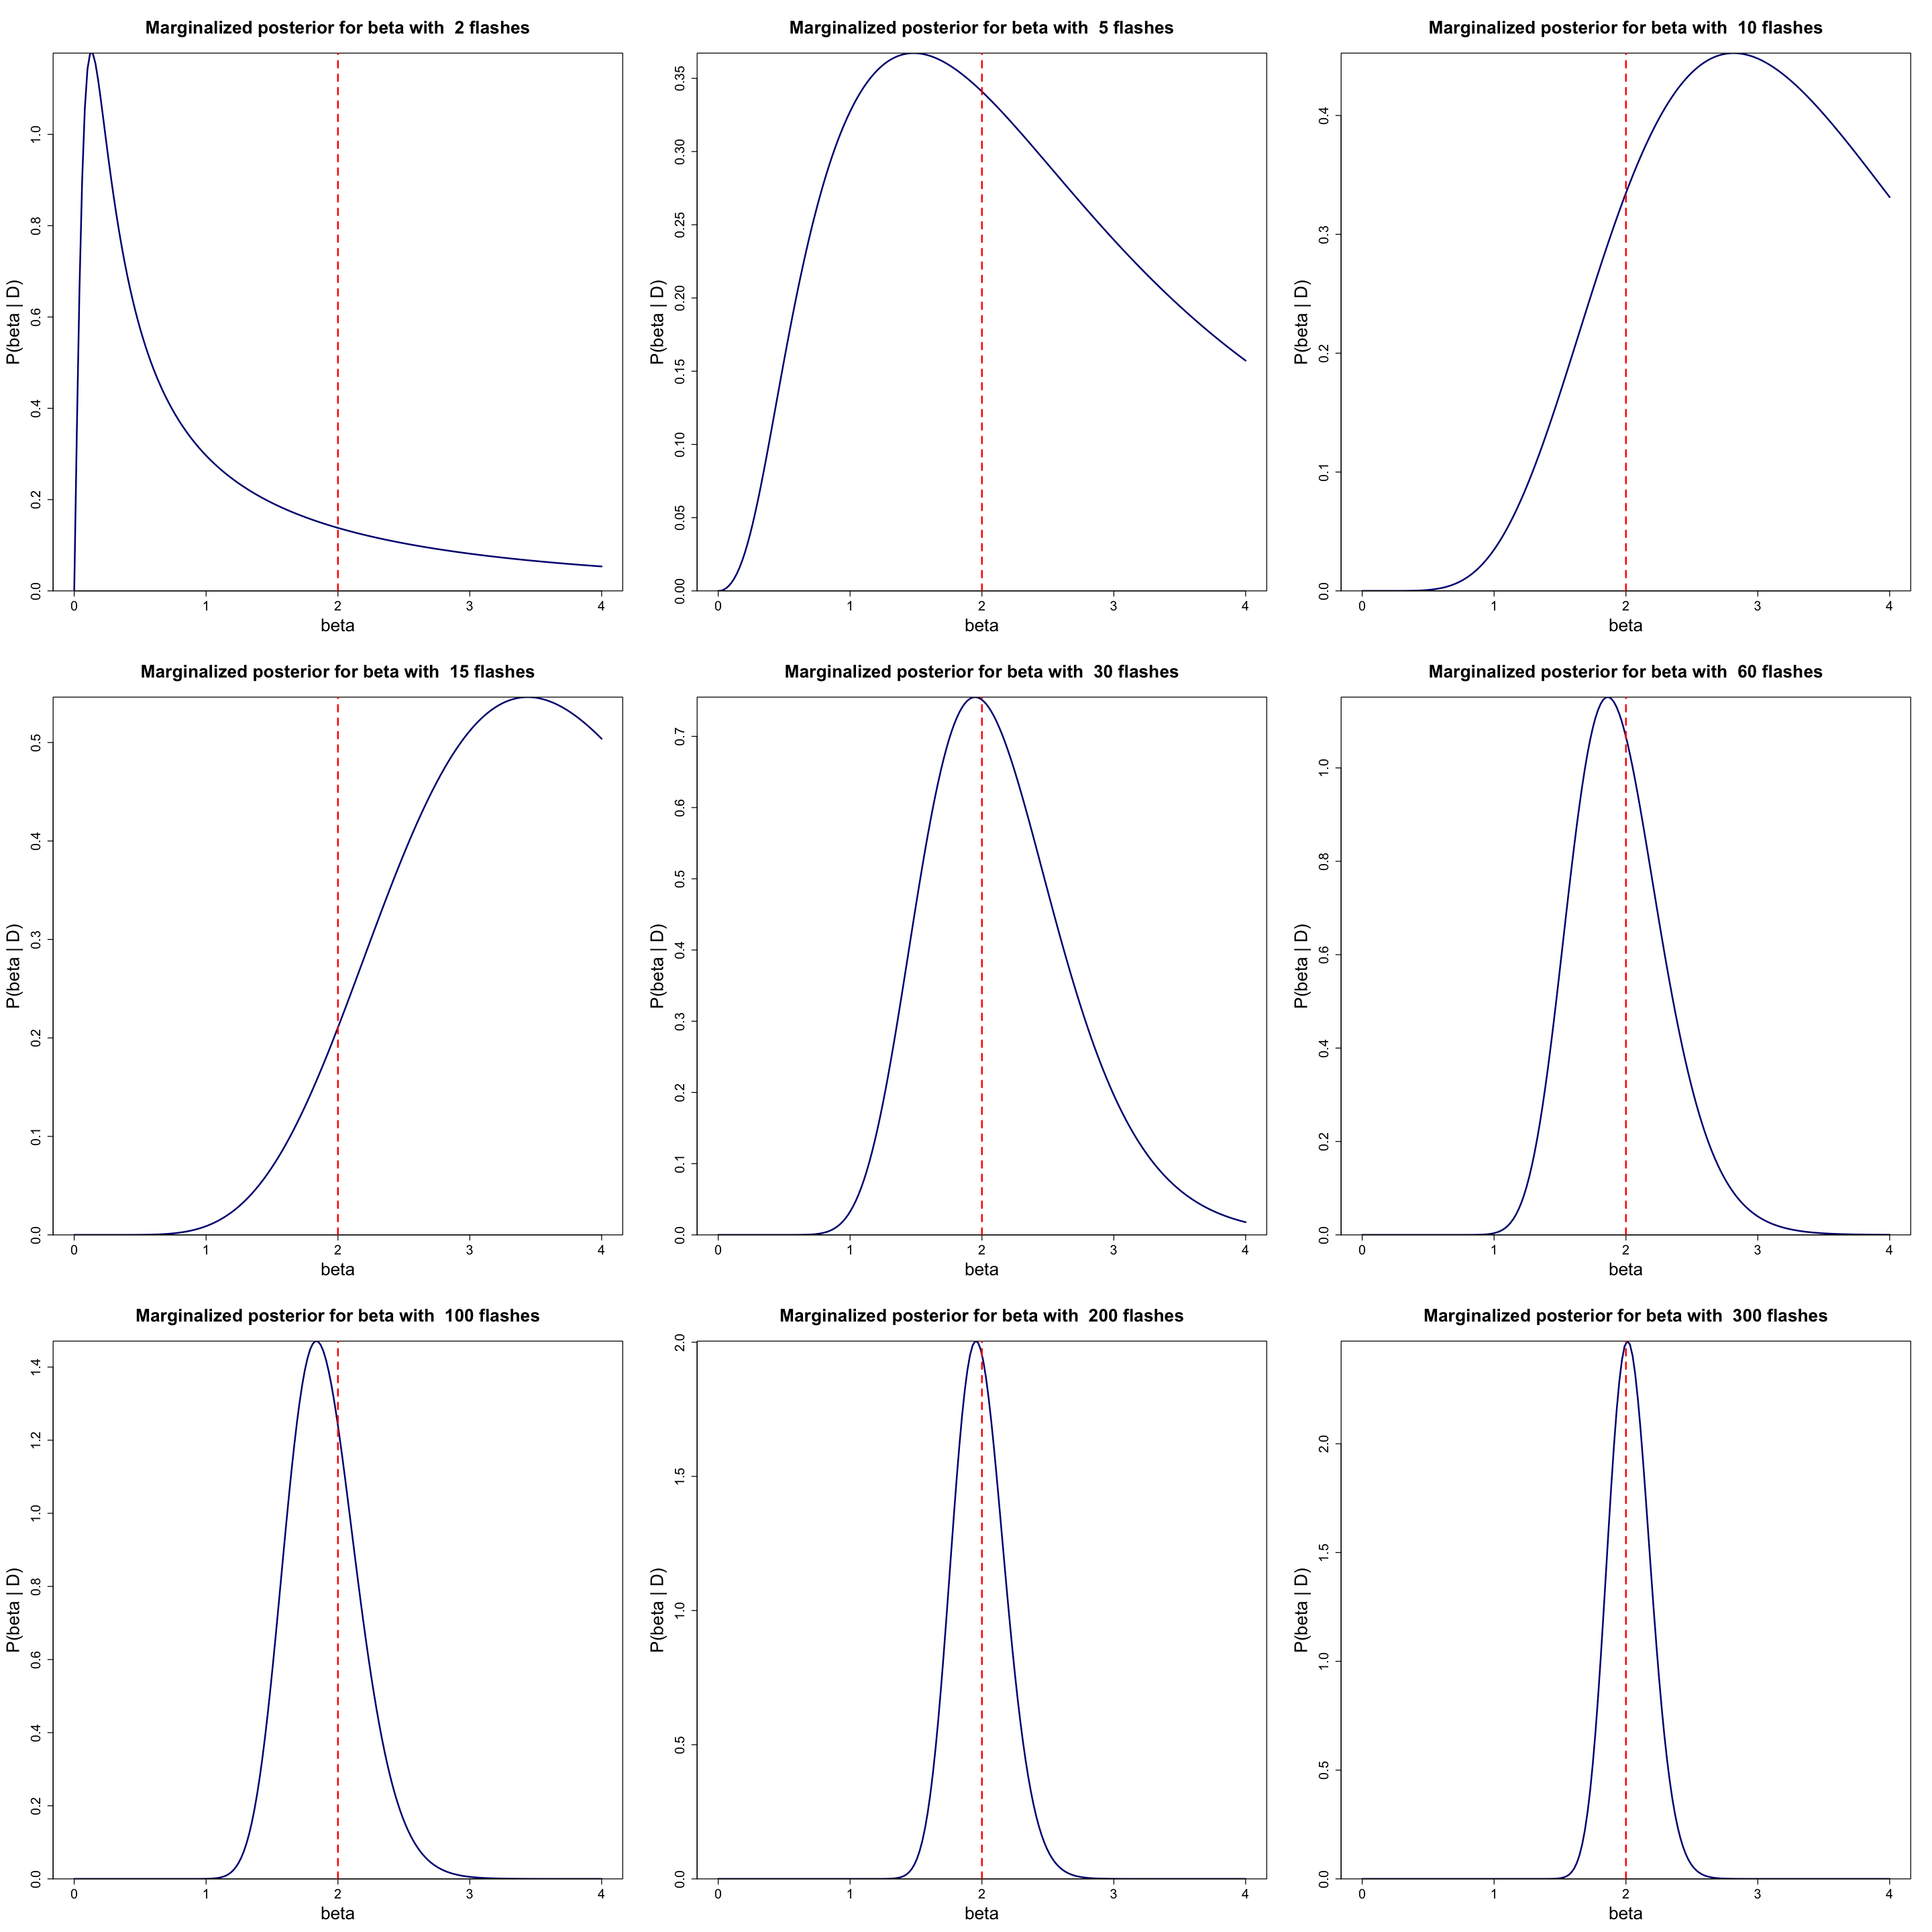

In [20]:
par(mfrow=c(3, 3), cex.main = 2, cex.lab=2, cex.axis=1.5, mar=c(5, 5, 5, 2))
options(repr.plot.width=24,repr.plot.height=24)

s <- c(2, 5, 10, 15, 30, 60, 100, 200, 300)
cat("The red vertical line in the plots represent the true value of beta")
for (n in s){
    z <- matrix(data=NA, nrow=length(alpha), ncol=length(beta))
    
    theta <- runif(n, -pi/2, pi/2) #random angles
    dt <- true.beta * tan(theta) + true.alpha #compute the x
    
    for(j in 1:length(alpha)) {
        for(k in 1:length(beta)) {
            z[j,k] <- p.log.like(alpha[j], beta[k], dt)
            }
        }
    
    z <- z - max(z)
    
    p_b_D <- apply(exp(z), 2, sum)
    p_b_D <- p_b_D/(diff(beta)[1]*sum(p_b_D))

    plot(beta, p_b_D, xlab="beta", yaxs="i", ylab="P(beta | D)", type="l", lwd=2,
         main=paste("Marginalized posterior for beta with ", n, "flashes"), col="navy")
    abline(v=true.beta, col="red", lwd=2, lty=2)
}

# Exercise 3

In [21]:
#Generative model
signal <- function(x, a, b, x0, w, t) { 
    t * (a*exp(-(x-x0)^2/(2*w^2)) + b)
}

In [22]:
# Log posterior
log.post <- function (d, x, A, B, x0, w, Dt) {
    if (A<0 || B<0) {
        return (-Inf)
    } # the effect of the prior
    
    sum(dpois(d, lambda=signal(x, A, B, x0, w, Dt), log=TRUE))
}

In [23]:
# Model parameters
x0      <- 0  # Signal peak
A.true  <- 2  # Signal amplitude
B.true  <- 1  # Background amplitude
Delta.t <- 5  # Exposure time
w       <- 1  # Signal width

p <- c(0.1, 0.25, 0.5, 1, 2, 3) # Resolutions

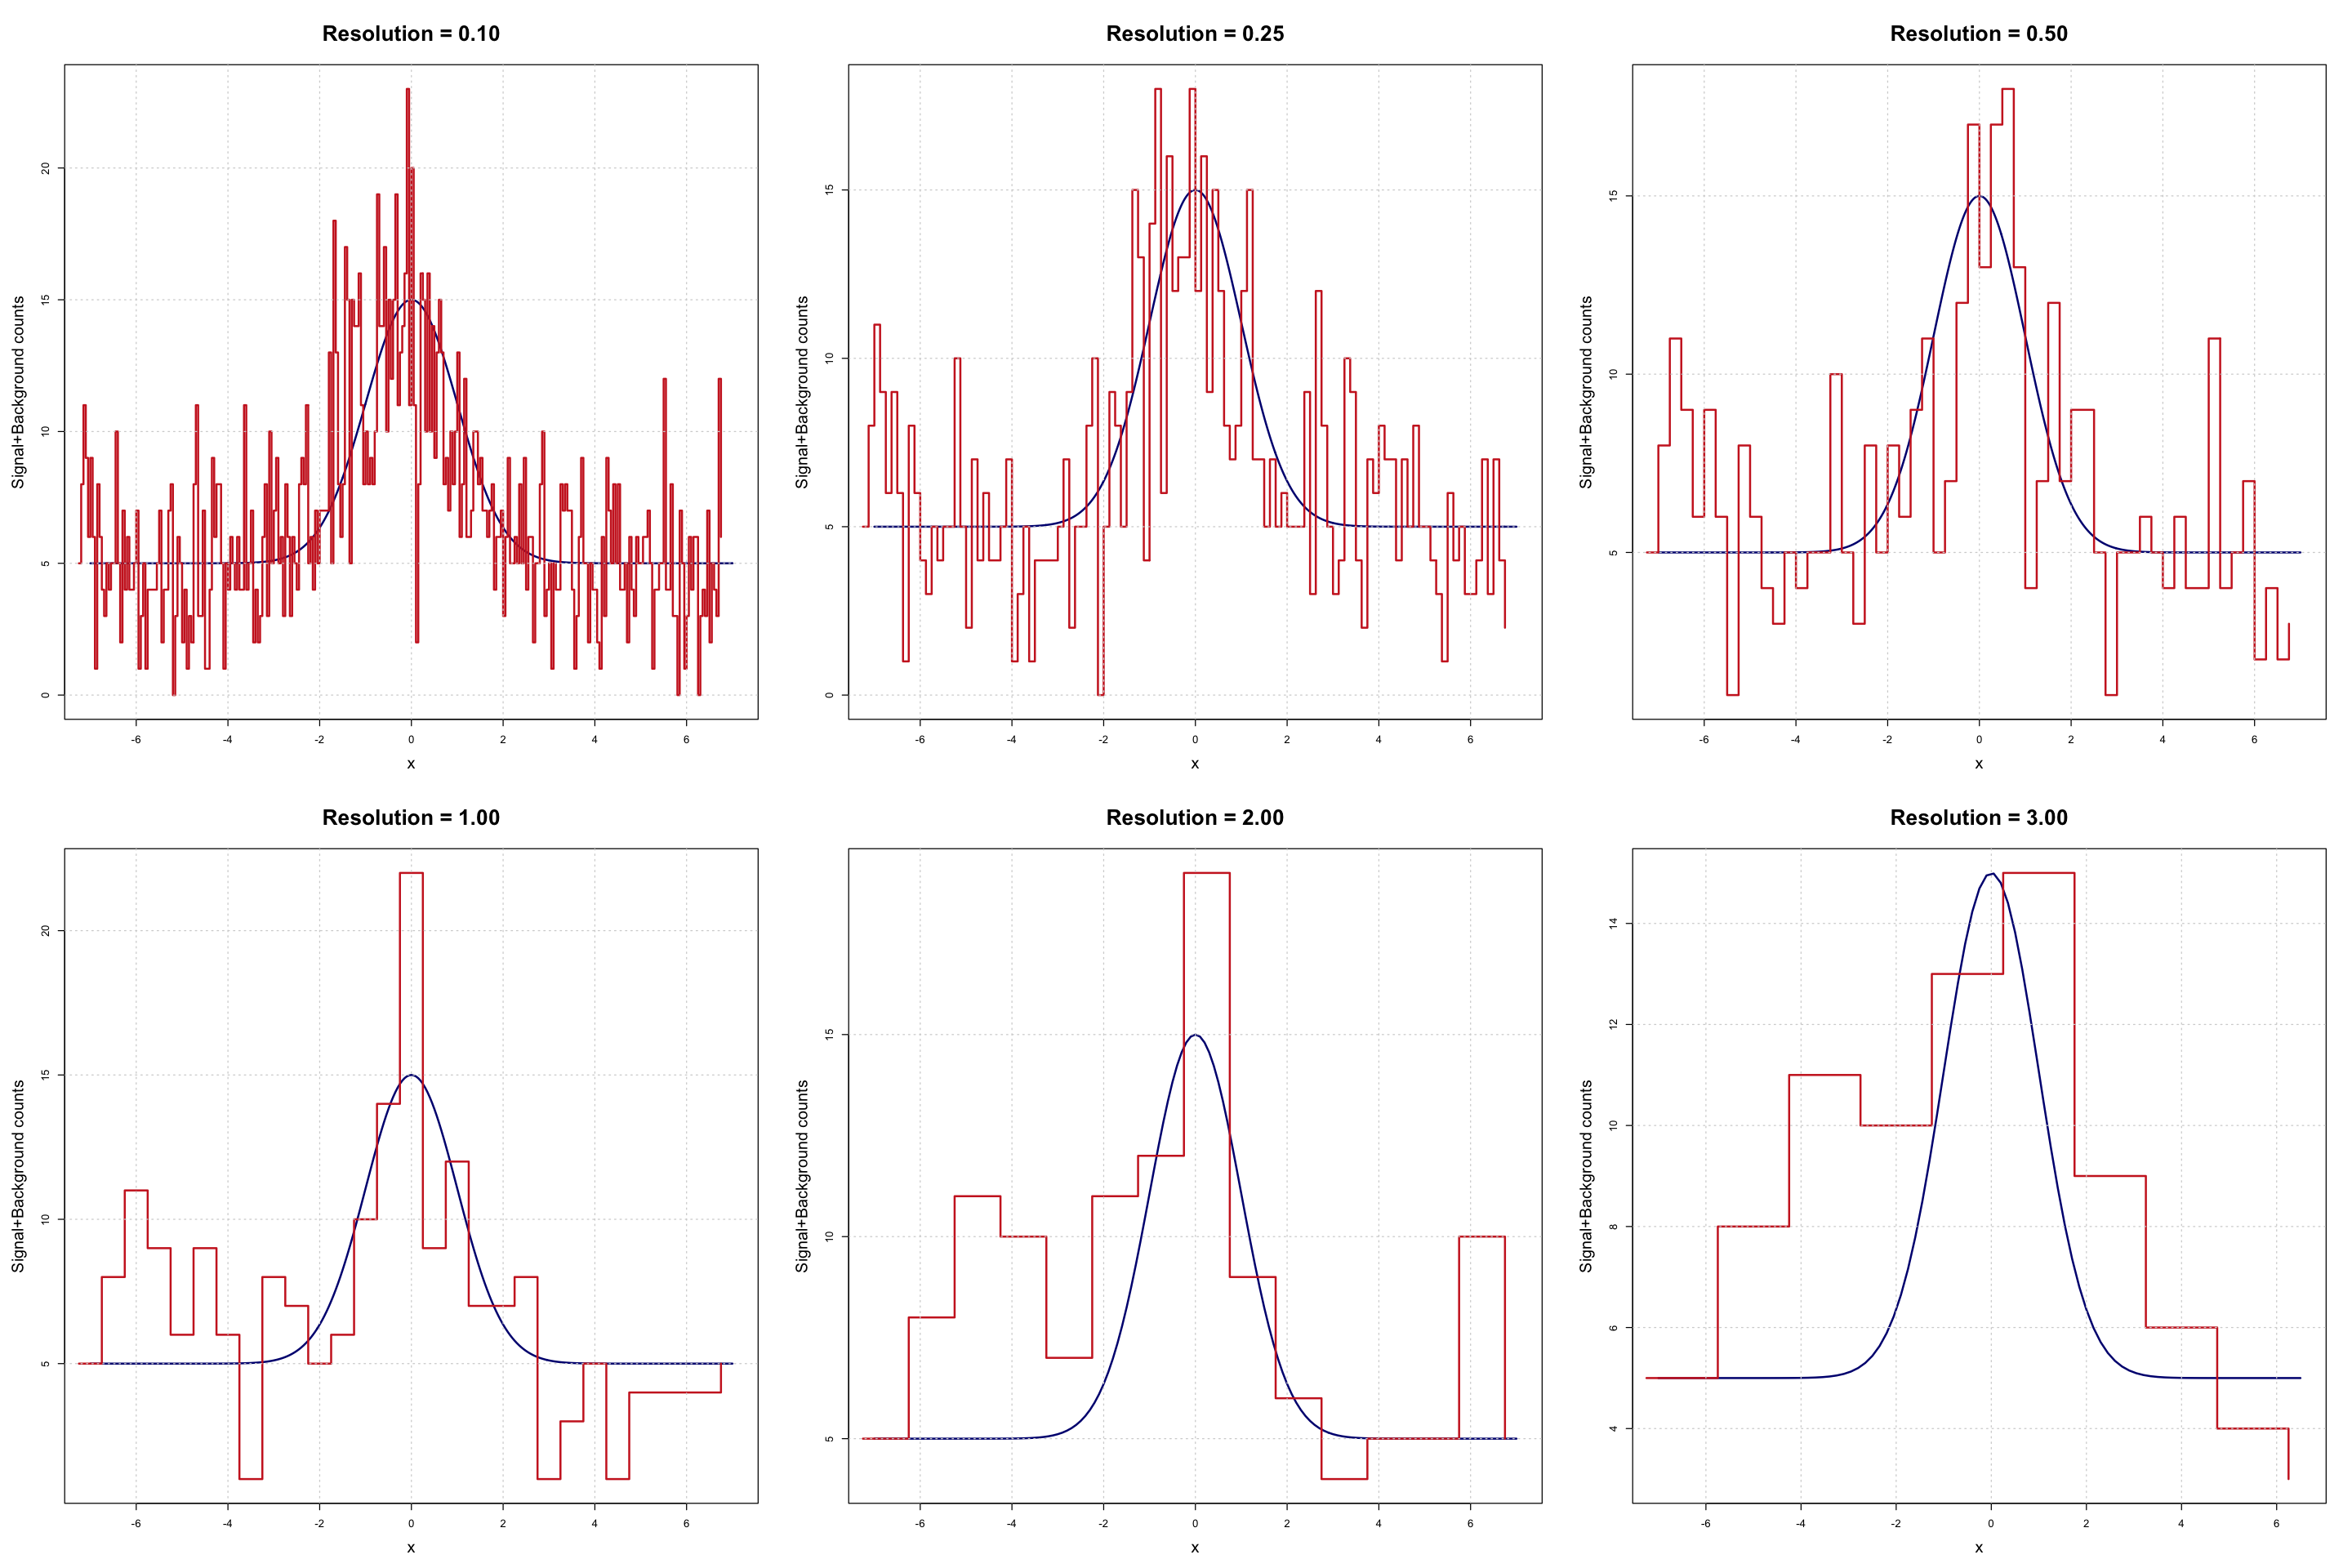

In [24]:
par(mfrow=c(2, 3), cex.main = 2, cex.lab=1.5, cex.axis=1, mar=c(5, 5, 5, 2))
options(repr.plot.width=24, repr.plot.height=16)

for (r in p) {
    set.seed(280503)
    xdata  <- seq(from=-7*w, to=7*w, by=0.5*r)
    s.true <- signal(xdata, A.true, B.true, x0, w, Delta.t)
    ddata  <- rpois(length(s.true), s.true)
    
    xplot <- seq(from=min(xdata), to=max(xdata), by=0.05*r)
    splot <- signal(xplot, A.true, B.true, x0, w, Delta.t)
    
    plot(xplot, splot, type="l", col="navy", lwd=2,
         xlab="x", ylab="Signal+Background counts", main=sprintf("Resolution = %1.2f", r),
         xlim=range(xplot), ylim=range(c(splot, ddata)))
    
    xdata.off <- xdata - 0.25
    lines(xdata.off, ddata, type="s", col="firebrick3", lwd=2)
    grid()
}

In [25]:
# - Sampling grid for computing posterior
alim <- c(0.0, 4.0)
blim <- c(0.5, 1.5)
Nsamp <- 100
uniGrid <- seq(from=1/(2*Nsamp), to=1-1/(2*Nsamp), by=1/Nsamp) 
delta_a <- diff(alim)/Nsamp 
delta_b <- diff(blim)/Nsamp
a <- alim[1] + diff(alim)*uniGrid 
b <- blim[1] + diff(blim)*uniGrid

The red dotted lines in the plots represent the true values of A and B. As we can see from the plots below, 
the finer the resolution, the higher the precision.

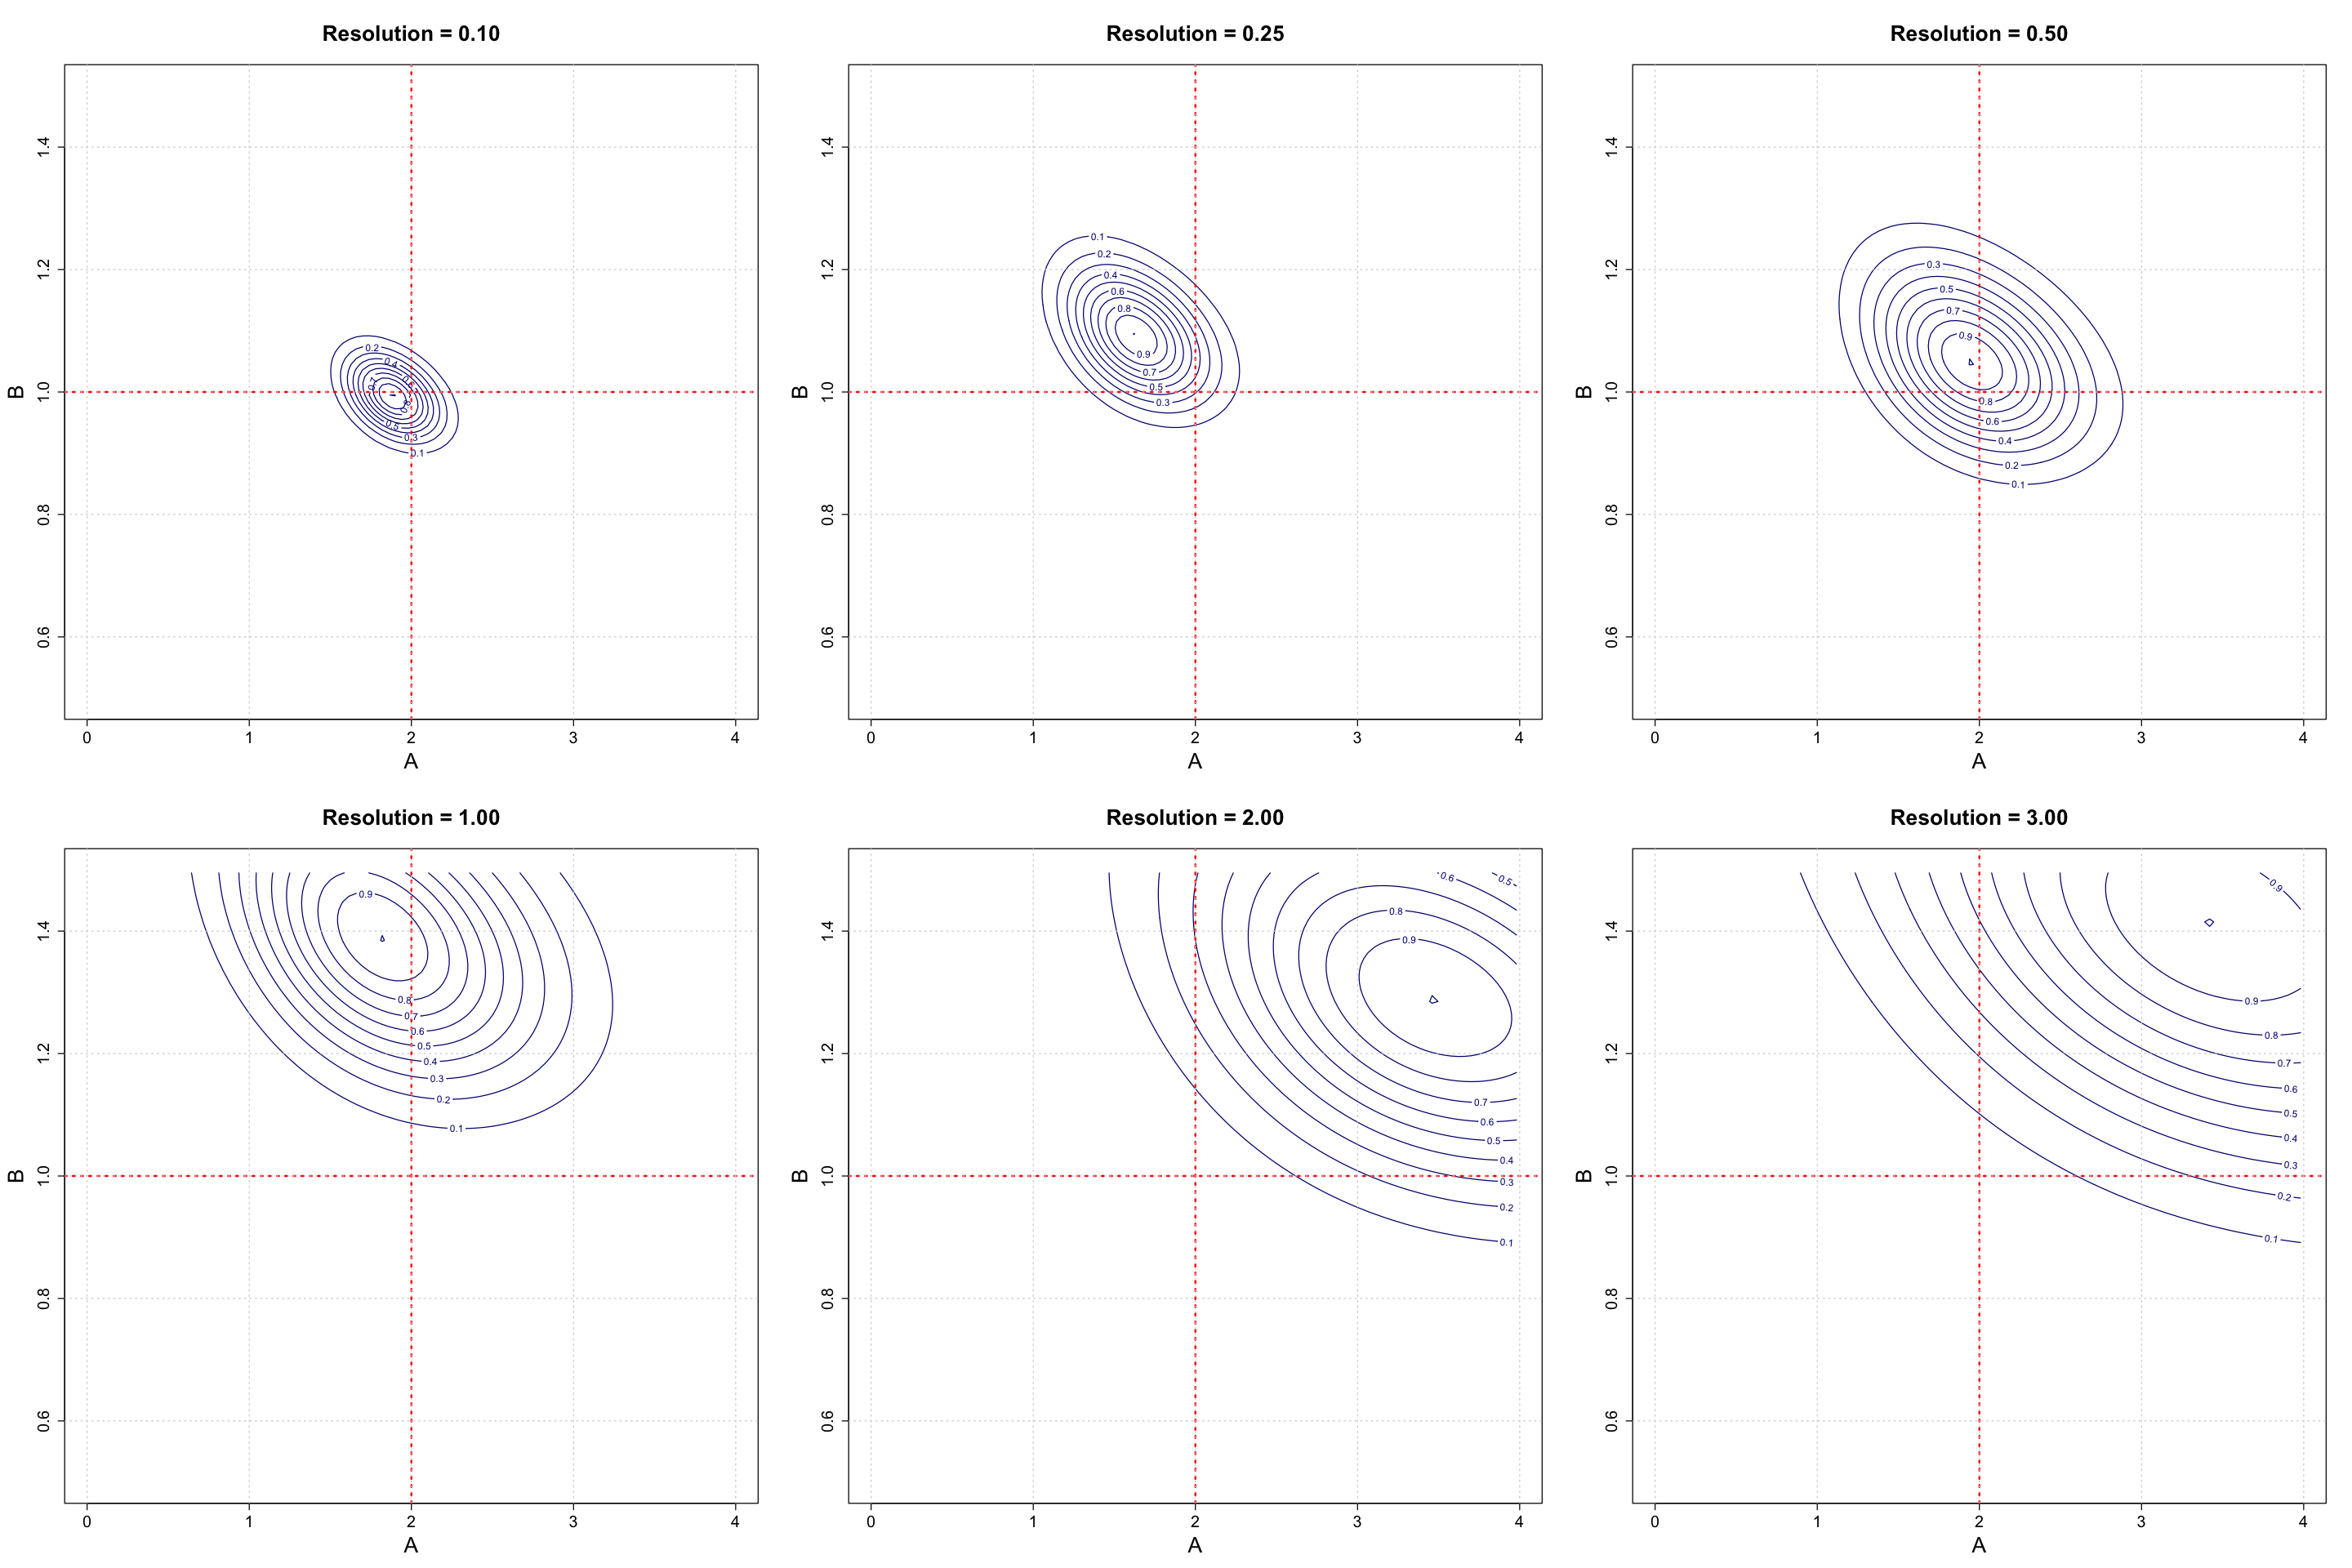

In [26]:
par(mfrow=c(2, 3), cex.main = 2, cex.lab=2, cex.axis=1.5, mar=c(5, 5, 5, 2))
options(repr.plot.width=24, repr.plot.height=16)

cat("The red dotted lines in the plots represent the true values of A and B. As we can see from the plots below, 
the finer the resolution, the higher the precision.")
p <- c(0.1, 0.25, 0.5, 1, 2, 3) # Resolutions
for (r in p){
    z <- matrix(data=NA, nrow=length(a), ncol=length(b))
    set.seed(280503)
    xdata  <- seq(from=-7*w, to=7*w, by=r*w)
    s.true <- signal(xdata, A.true, B.true, x0, w, Delta.t)
    ddata  <- rpois(length(s.true), s.true)
    
    xplot <- seq(from=min(xdata), to=max(xdata), by=r*w)
    splot <- signal(xplot, A.true, B.true, x0, w, Delta.t)
    xdata.off <- xdata - r/2
    
    for(j in 1:length(a)) {
        for(k in 1:length(b)) {
            z[j,k] <- log.post(ddata, xdata, a[j], b[k], x0, w, Delta.t)
            }
        }
    z <- z - max(z)
    
    contour(a, b, exp(z),  col = "navy",
            xlab=expression(A), ylab=expression(B), main=sprintf("Resolution = %1.2f", r))
    
    abline (v=A.true, h=B.true, col= "red", lty=3, lwd=2)
    grid()
}

## Marginalization

The vertical line in the plots represent the true value of A

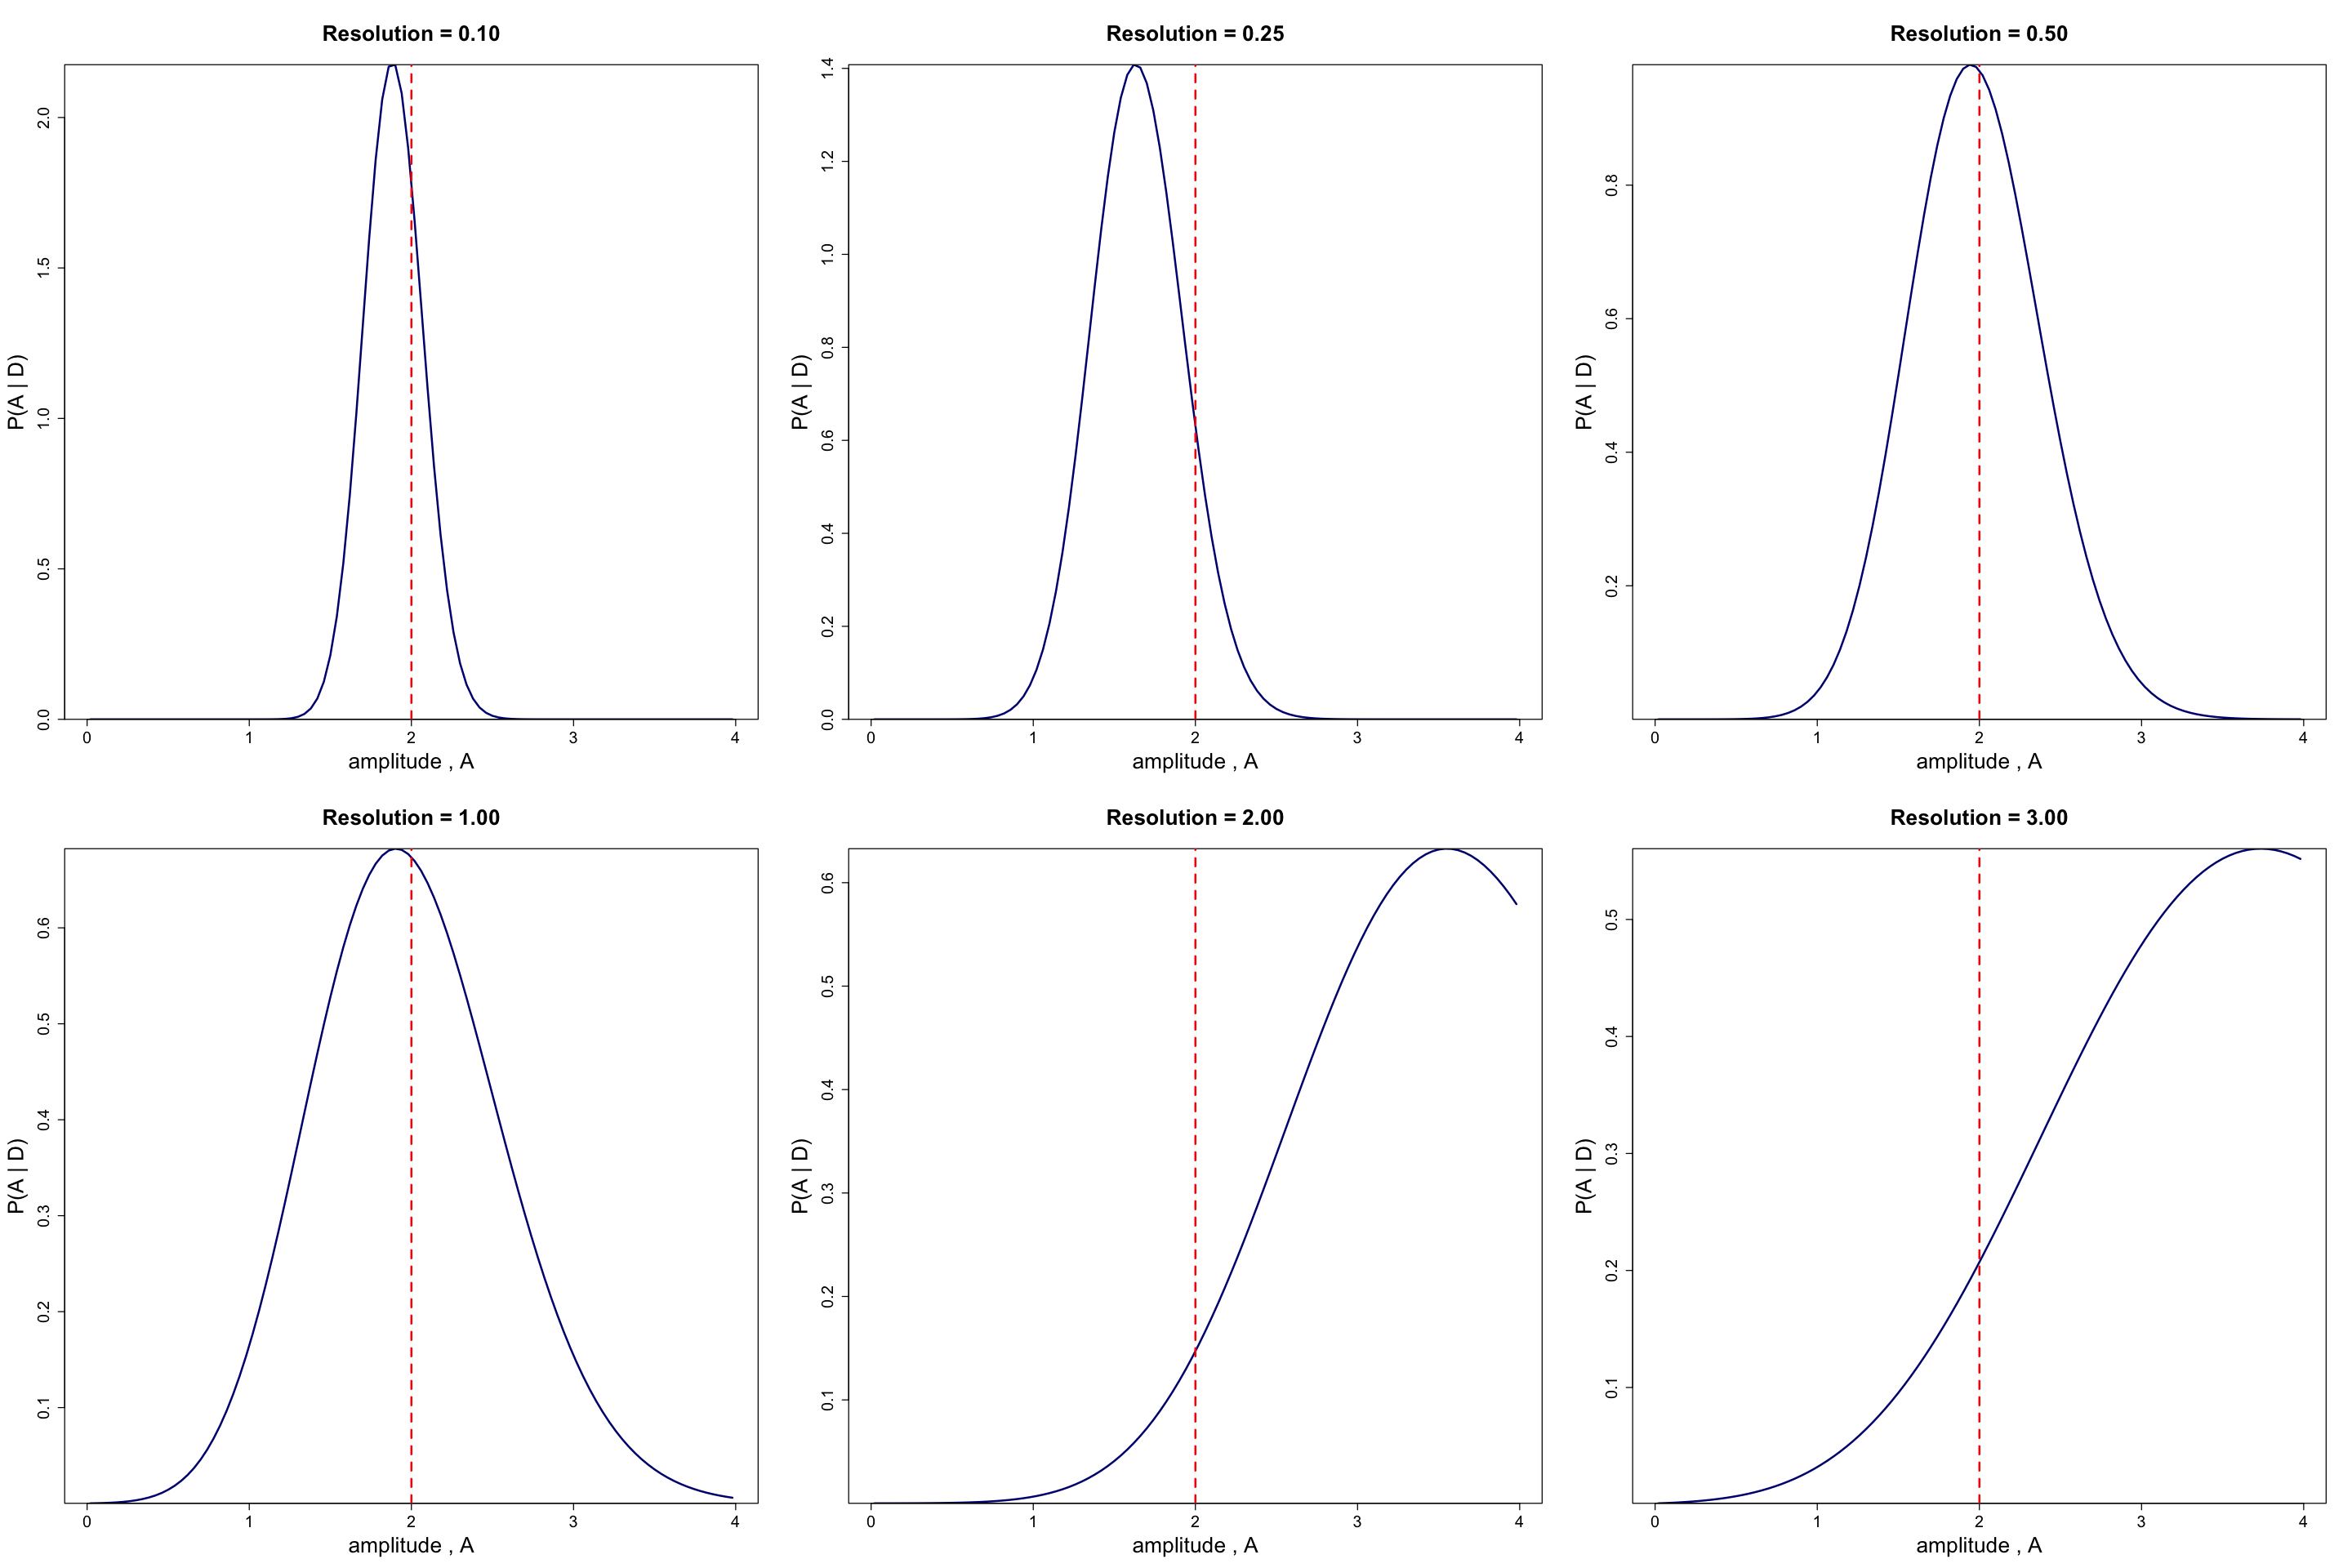

In [27]:
par(mfrow=c(2, 3), cex.main = 2, cex.lab=2, cex.axis=1.5, mar=c(5, 5, 5, 2))
options(repr.plot.width=24, repr.plot.height=16)

cat("The vertical line in the plots represent the true value of A")
p <- c(0.1, 0.25, 0.5, 1, 2, 3) # Resolutions
for (r in p){
    z <- matrix(data=NA, nrow=length(a), ncol=length(b))
    set.seed(280503)
    xdata  <- seq(from=-7*w, to=7*w, by=r*w)
    s.true <- signal(xdata, A.true, B.true, x0, w, Delta.t)
    ddata  <- rpois(length(s.true), s.true)
    
    xplot <- seq(from=min(xdata), to=max(xdata), by=r*w)
    splot <- signal(xplot, A.true, B.true, x0, w, Delta.t)
    xdata.off <- xdata - r/2
    
    for(j in 1:length(a)) {
        for(k in 1:length(b)) {
            z[j,k] <- log.post(ddata, xdata, a[j], b[k], x0, w, Delta.t)
            }
        }
    z <- z - max(z)
    
    p_a_D <- apply(exp(z), 1, sum)
    p_a_D <- p_a_D/(delta_a*sum(p_a_D))

    plot(a, p_a_D, xlab="amplitude , A", yaxs="i", ylab="P(A | D)", type="l", lwd=2,
         main=sprintf("Resolution = %1.2f", r), col="navy")
    abline(v=A.true, col="red", lty=2, lwd=2)
}

The vertical line in the plots represent the true value of B

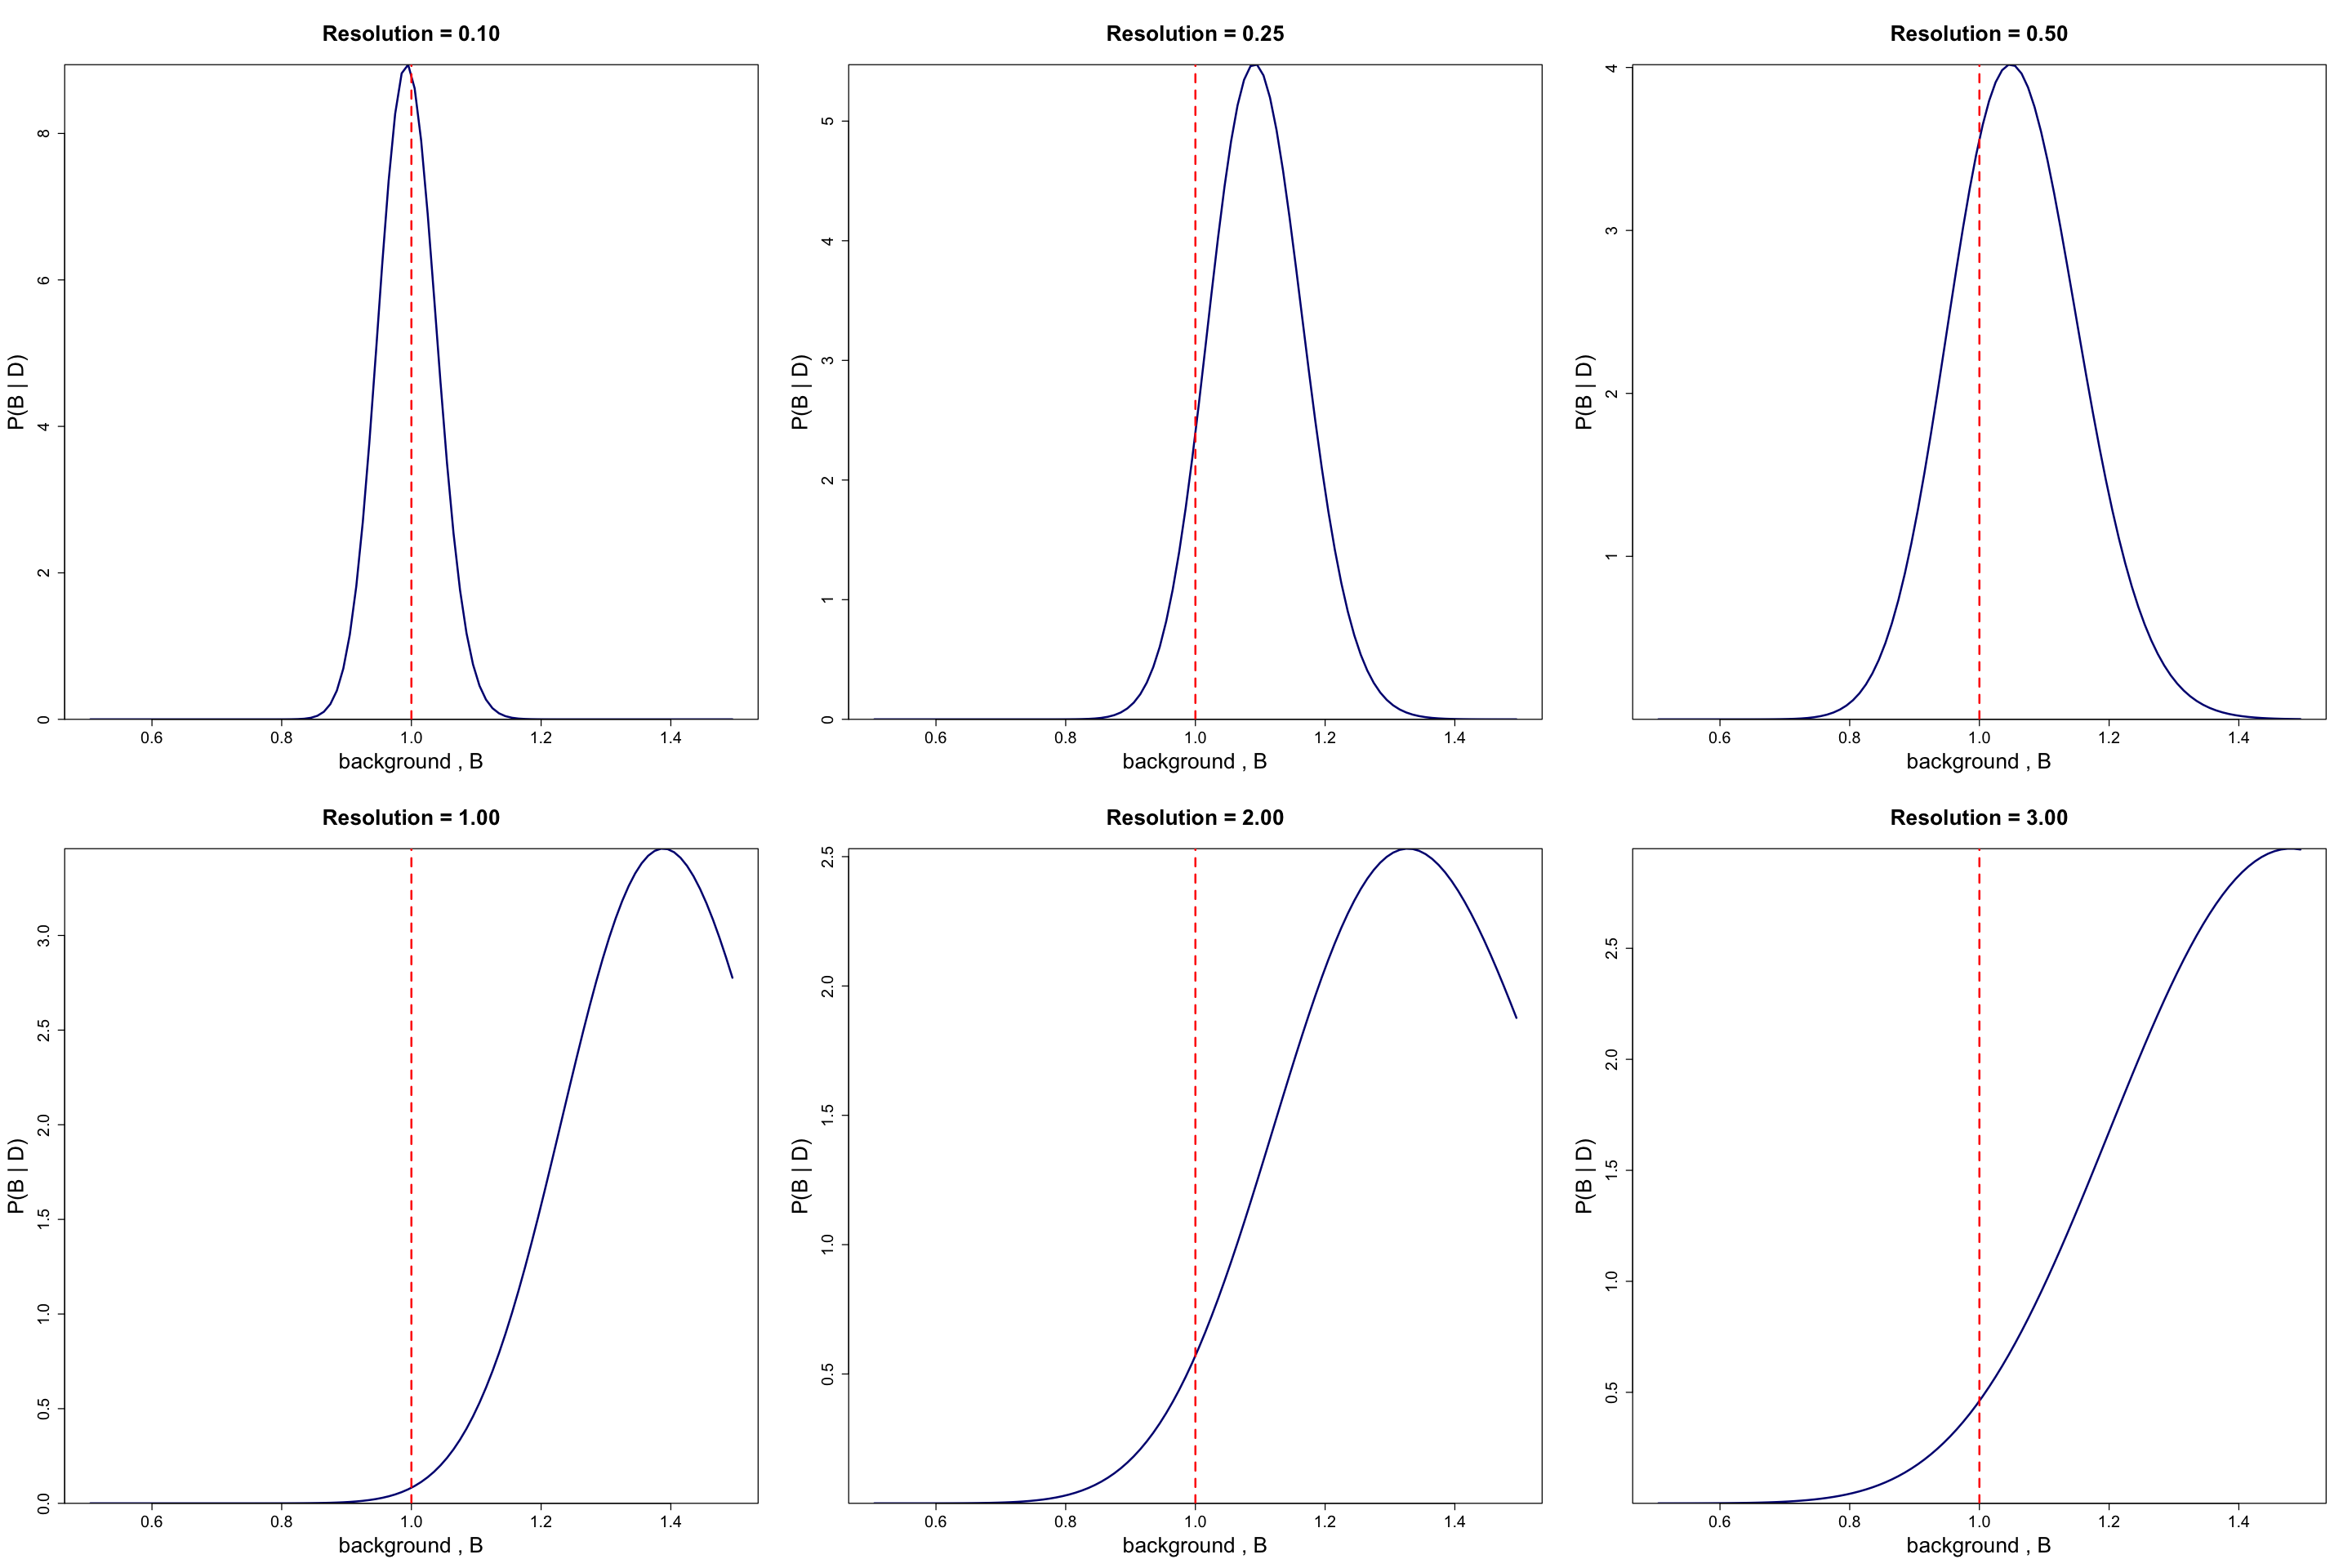

In [28]:
par(mfrow=c(2, 3), cex.main = 2, cex.lab=2, cex.axis=1.5, mar=c(5, 5, 5, 2))
options(repr.plot.width=24, repr.plot.height=16)

cat("The vertical line in the plots represent the true value of B")
p <- c(0.1, 0.25, 0.5, 1, 2, 3) # Resolutions
for (r in p){
    z <- matrix(data=NA, nrow=length(a), ncol=length(b))
    set.seed(280503)
    xdata  <- seq(from=-7*w, to=7*w, by=r*w)
    s.true <- signal(xdata, A.true, B.true, x0, w, Delta.t)
    ddata  <- rpois(length(s.true), s.true)
    
    xplot <- seq(from=min(xdata), to=max(xdata), by=r*w)
    splot <- signal(xplot, A.true, B.true, x0, w, Delta.t)
    xdata.off <- xdata - r/2
    
    for(j in 1:length(a)) {
        for(k in 1:length(b)) {
            z[j,k] <- log.post(ddata, xdata, a[j], b[k], x0, w, Delta.t)
            }
        }
    z <- z - max(z)
    
    p_b_D <- apply(exp(z), 2, sum) 
    p_b_D <- p_b_D/(delta_b*sum(p_b_D))
    
    plot(b, p_b_D, xlab="background , B", yaxs="i",ylab="P(B | D)", type="l", lwd=2,
         main=sprintf("Resolution = %1.2f", r), col="navy")
    abline(v=B.true, col="red", lwd=2, lty=2)
}

## A/B ratio

In [29]:
# Model parameters
x0      <- 0  # Signal peak
w       <- 1  # Signal width
A.true  <- 2  # Signal amplitude
Delta.t <- 5  # Exposure time

b <- c(A.true/5, A.true/2, A.true, 2*A.true, 4*A.true, 6*A.true) # Background Amplitudes

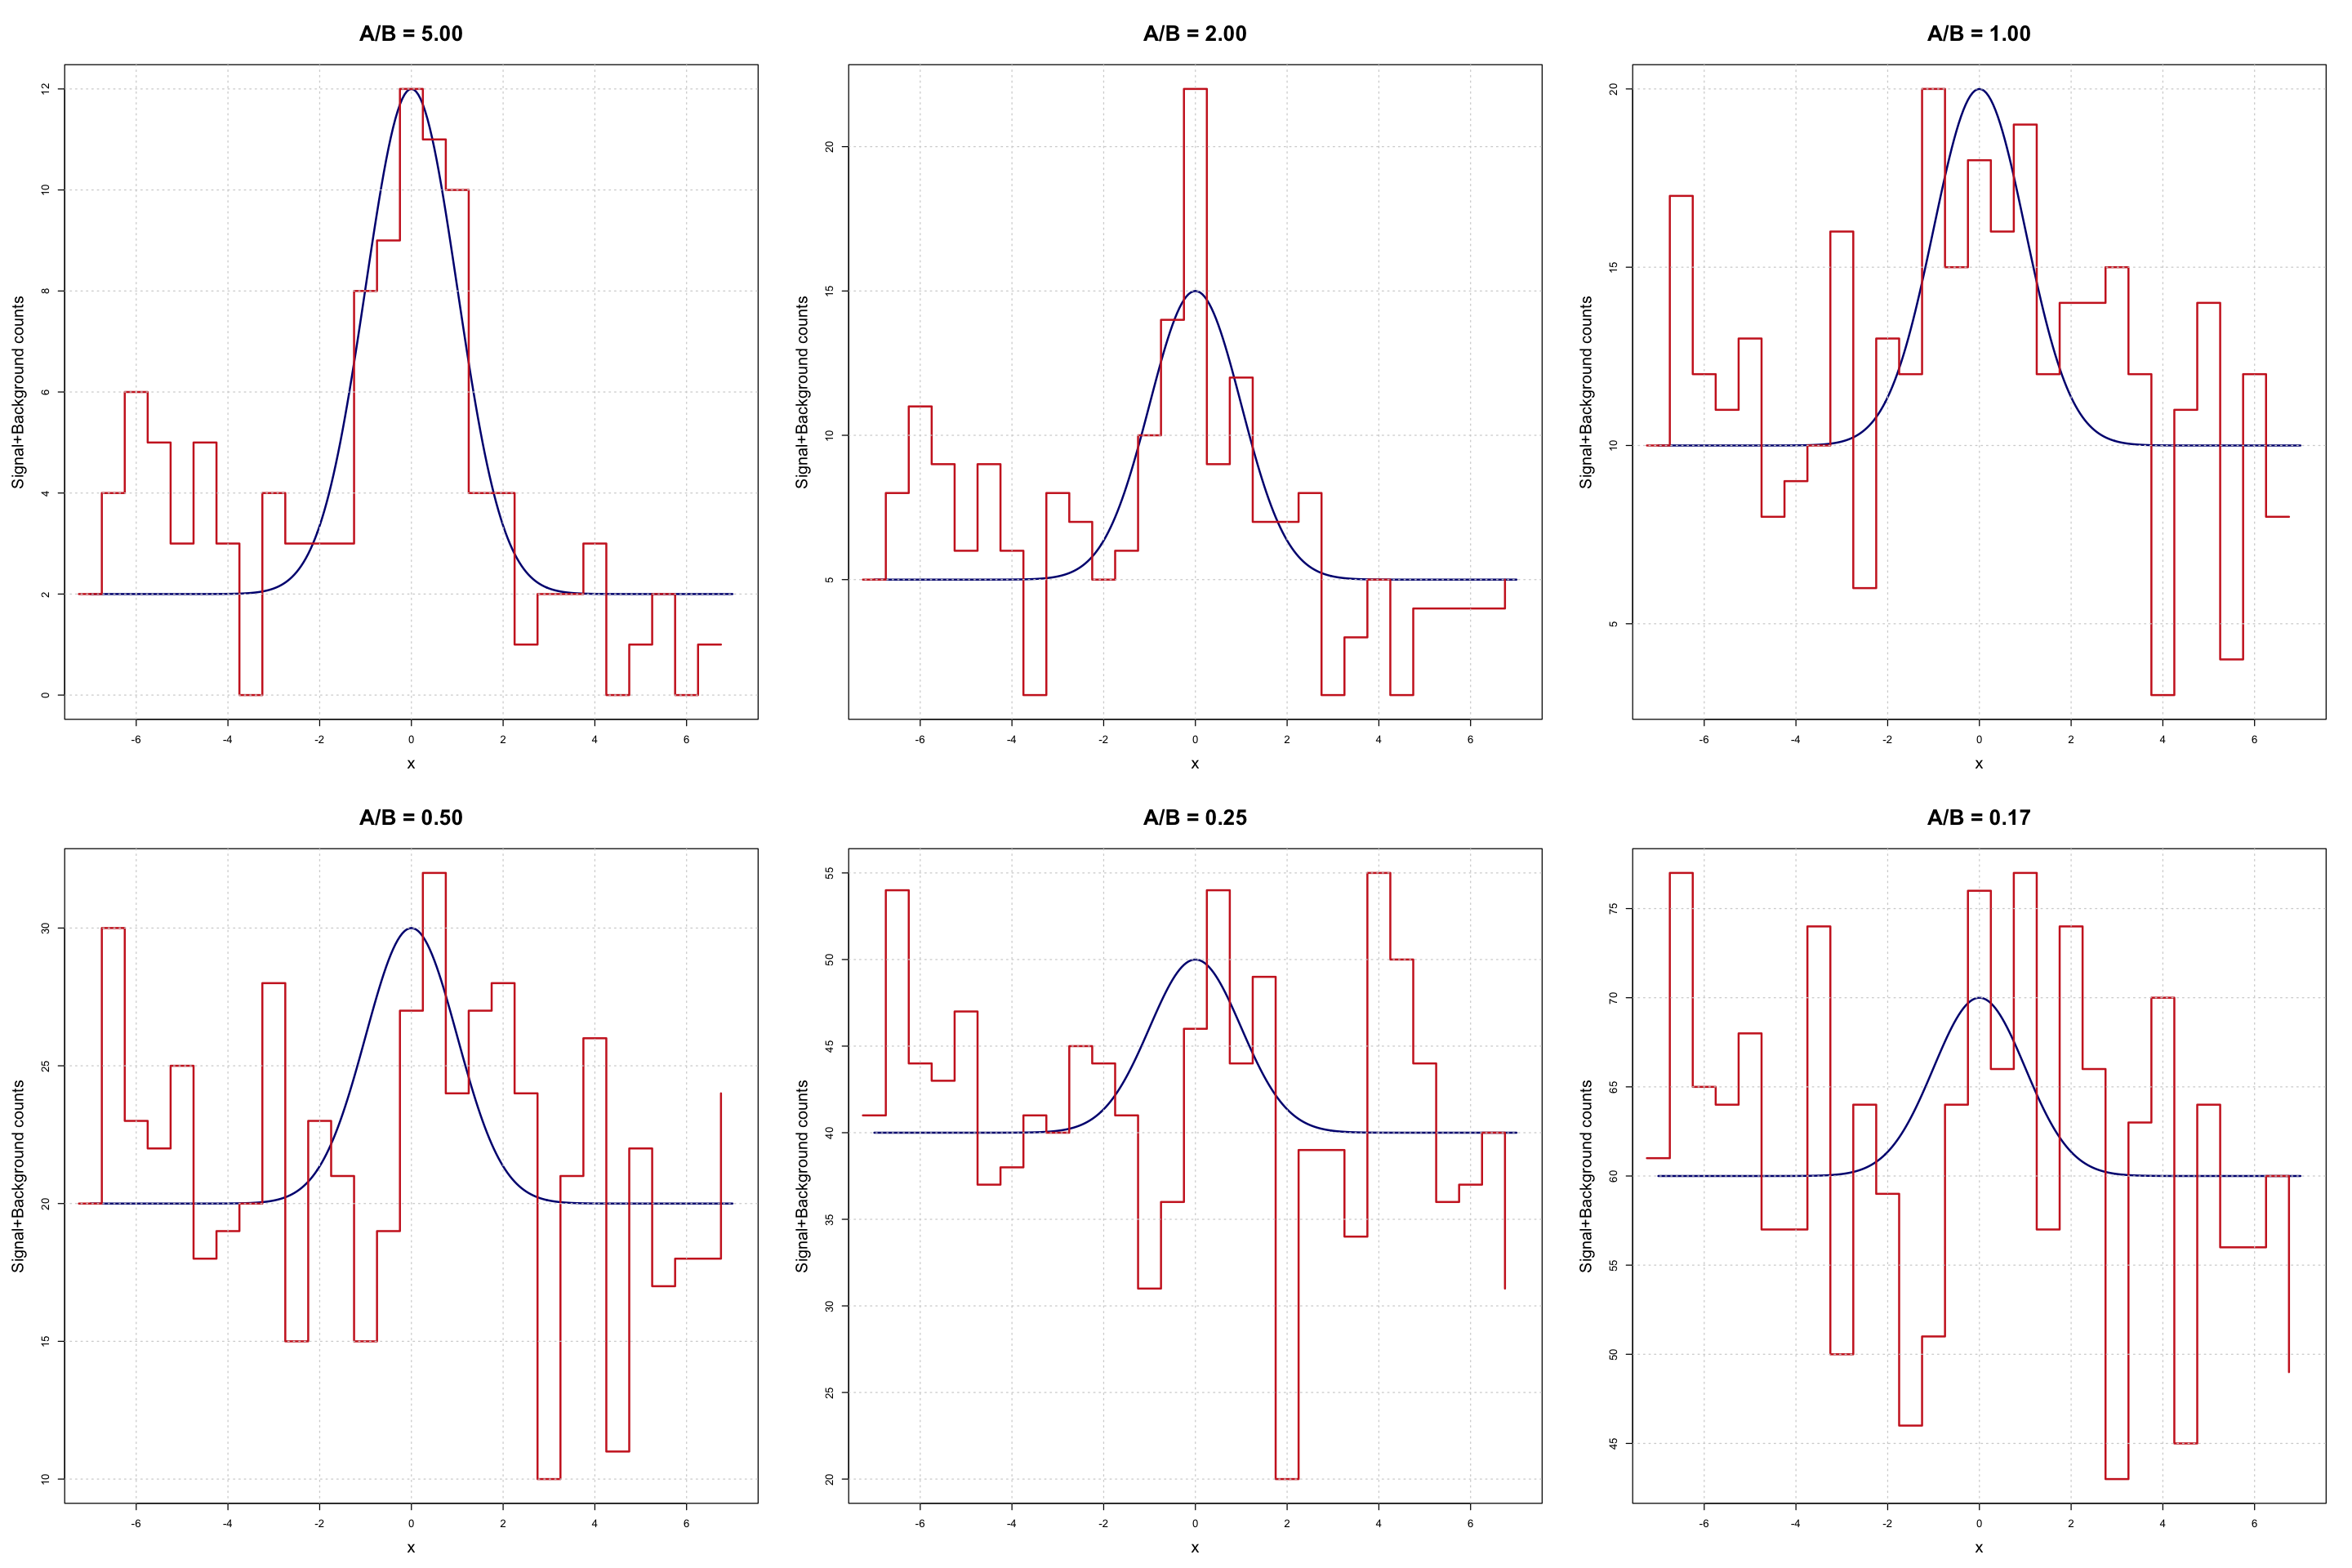

In [30]:
par(mfrow=c(2, 3), cex.main = 2, cex.lab=1.5, cex.axis=1, mar=c(5, 5, 5, 2))
options(repr.plot.width=24, repr.plot.height=16)

for (B.true in b) {
    set.seed(280503)
    xdata  <- seq(from=-7*w, to=7*w, by=0.5*w)
    s.true <- signal(xdata, A.true, B.true, x0, w, Delta.t)
    ddata  <- rpois(length(s.true), s.true)
    
    xplot <- seq(from=min(xdata), to=max(xdata), by=0.05*w)
    splot <- signal(xplot, A.true, B.true, x0, w, Delta.t)
    
    plot(xplot, splot, type="l", col="navy", lwd=2,
         xlab="x", ylab="Signal+Background counts", main=sprintf("A/B = %1.2f", A.true/B.true),
         xlim=range(xplot), ylim=range(c(splot, ddata)))
    
    xdata.off <- xdata - 0.25
    lines(xdata.off, ddata, type="s", col="firebrick3", lwd=2)
    grid()
}

In [31]:
# - Sampling grid for computing posterior
alim <- c(0.0, 4.0)
Nsamp <- 100
uniGrid <- seq(from=1/(2*Nsamp), to=1-1/(2*Nsamp), by=1/Nsamp) 
delta_a <- diff(alim)/Nsamp 
a <- alim[1] + diff(alim)*uniGrid 

The red dotted lines in the plots represent the true values of A and B. As we can see from the plots,
the larger the ratio, the higher the precision. This is sensible, since B represent the noise amplitude.

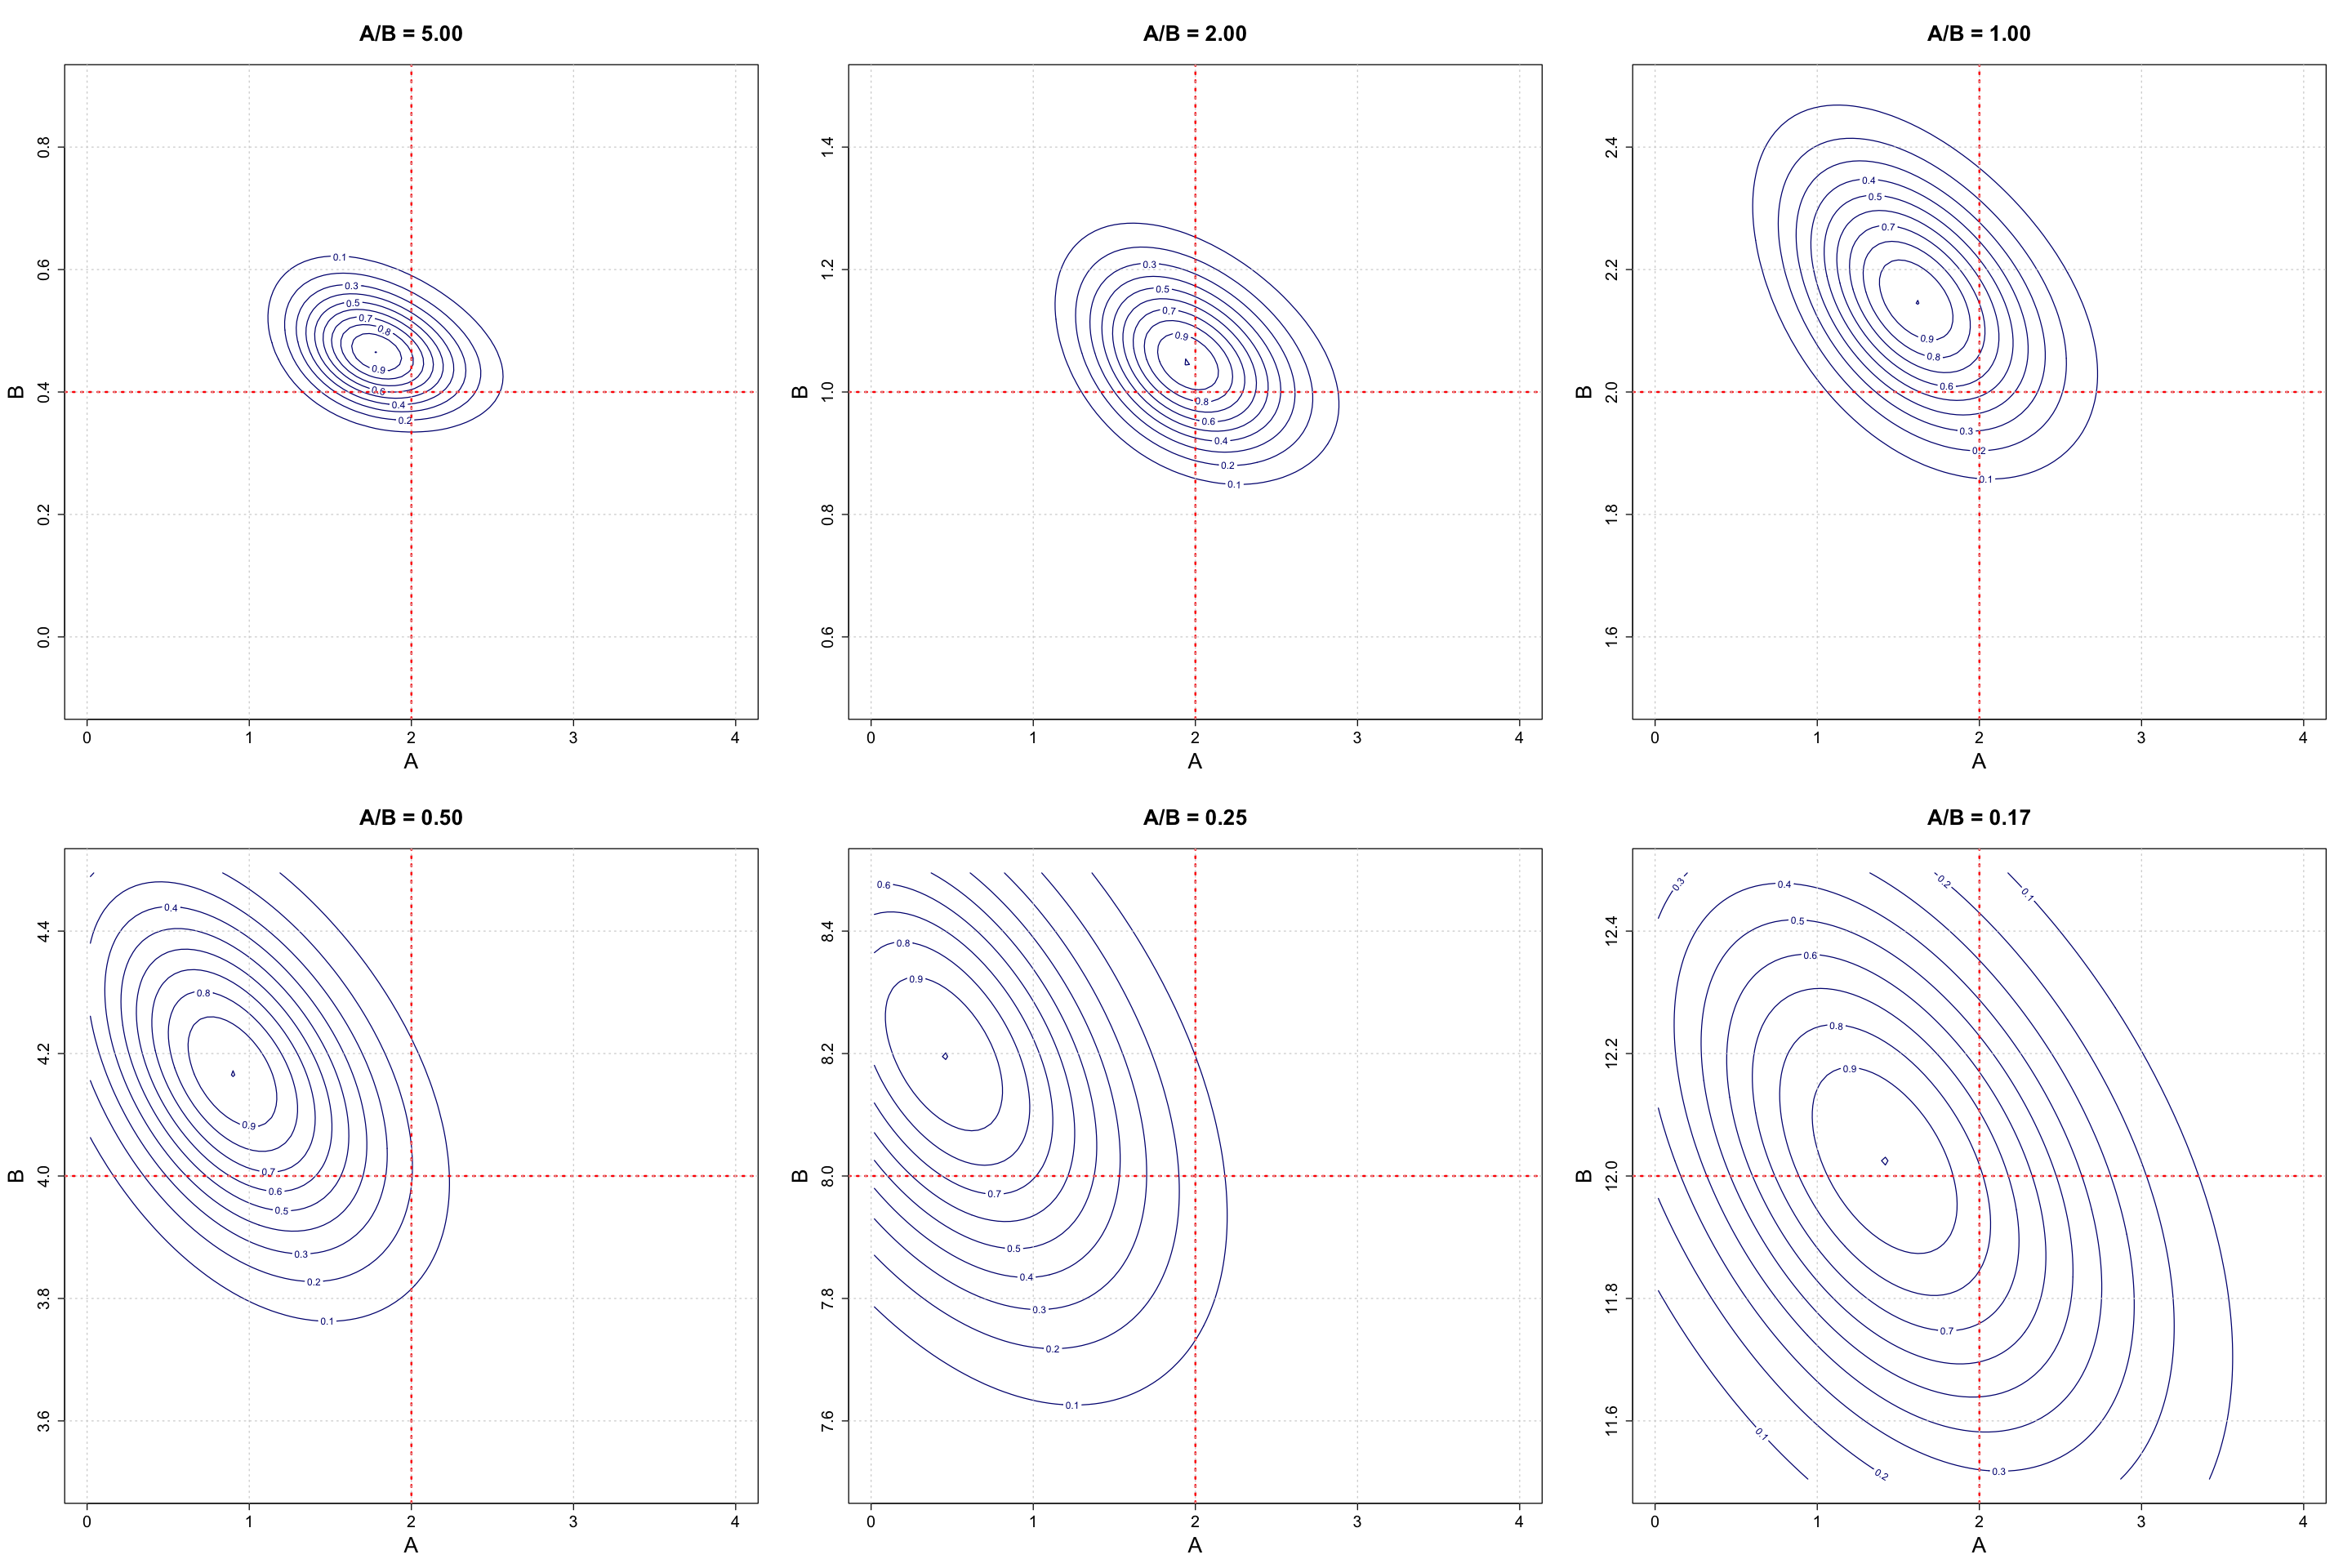

In [32]:
par(mfrow=c(2, 3), cex.main = 2, cex.lab=2, cex.axis=1.5, mar=c(5, 5, 5, 2))
options(repr.plot.width=24, repr.plot.height=16)

cat("The red dotted lines in the plots represent the true values of A and B. As we can see from the plots,
the larger the ratio, the higher the precision. This is sensible, since B represent the noise amplitude.")
for (B.true in b){
    blim <- c(B.true-0.5, B.true+0.5)
    delta_b <- diff(blim)/Nsamp
    b <- blim[1] + diff(blim)*uniGrid
    z <- matrix(data=NA, nrow=length(a), ncol=length(b))
    set.seed(280503)
    xdata  <- seq(from=-7*w, to=7*w, by=0.5*w)
    s.true <- signal(xdata, A.true, B.true, x0, w, Delta.t)
    ddata  <- rpois(length(s.true), s.true)
    
    xplot <- seq(from=min(xdata), to=max(xdata), by=0.05*w)
    splot <- signal(xplot, A.true, B.true, x0, w, Delta.t)
    xdata.off <- xdata - 0.25
    
    for(j in 1:length(a)) {
        for(k in 1:length(b)) {
            z[j,k] <- log.post(ddata, xdata, a[j], b[k], x0, w, Delta.t)
            }
        }
    z <- z - max(z)
    
    contour(a, b, exp(z),  col = "navy",
            xlab=expression(A), ylab=expression(B), main=sprintf("A/B = %1.2f", A.true/B.true))
    
    abline (v=A.true, h=B.true, col= "red", lty=3, lwd=2)
    grid()
}